In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    roc_curve,
    auc,
    confusion_matrix,
    roc_auc_score,
    plot_roc_curve,
    precision_recall_curve
)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [7]:
df.describe(include='object')

Attrition BusinessTravel              Department EducationField Gender  \
count       1470           1470                    1470           1470   1470   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        1233           1043                     961            606    882   

                JobRole MaritalStatus Over18 OverTime  
count              1470          1470   1470     1470  
unique                9             3      1        2  
top     Sales Executive       Married      Y       No  
freq                326           673   1470     1054

In [8]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [11]:
df.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)


In [12]:
df.drop(['EmployeeNumber'],inplace=True,axis=1)

### Exploratory Data Analysis 

In [13]:
for n, feature in enumerate(df.columns):
    if df[feature].nunique() < 10:
        if df[feature].nunique() == 1:
            df.drop([feature],inplace=True,axis=1)
            continue
        
        print(f'{n}. {feature.upper()}')
        print(df[feature].unique())
        print("="*50)
        print()
        

1. ATTRITION
[1 0]

2. BUSINESSTRAVEL
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

4. DEPARTMENT
['Sales' 'Research & Development' 'Human Resources']

6. EDUCATION
[2 1 4 3 5]

7. EDUCATIONFIELD
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

9. ENVIRONMENTSATISFACTION
[2 3 4 1]

10. GENDER
['Female' 'Male']

12. JOBINVOLVEMENT
[3 2 4 1]

13. JOBLEVEL
[2 1 3 4 5]

14. JOBROLE
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

15. JOBSATISFACTION
[4 2 3 1]

16. MARITALSTATUS
['Single' 'Married' 'Divorced']

21. OVERTIME
['Yes' 'No']

23. PERFORMANCERATING
[3 4]

24. RELATIONSHIPSATISFACTION
[1 4 2 3]

26. STOCKOPTIONLEVEL
[0 1 3 2]

28. TRAININGTIMESLASTYEAR
[0 3 2 5 1 4 6]

29. WORKLIFEBALANCE
[1 3 2 4]



In [78]:
discrete_features = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
                 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
categorical_features = ['Attrition', 'BusinessTravel','Department', 'Education', 'EducationField','EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
                    'MaritalStatus','OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                    'WorkLifeBalance']

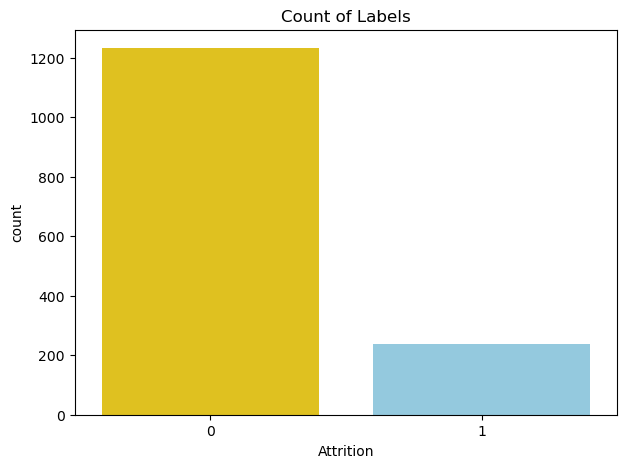

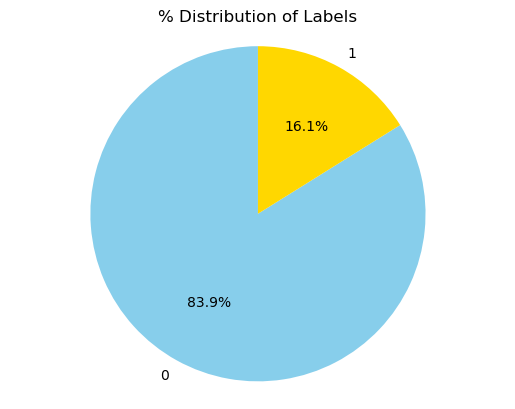

In [14]:
plt.figure(figsize=(7,5))
sns.countplot(x='Attrition',data=df,palette=['#FFD700','#87CEEB'])
plt.title("Count of Labels")
plt.show()


labels = [i for i in df['Attrition'].value_counts().index]
label_counts = [round(i/len(df)*100,2) for i in df['Attrition'].value_counts()]
plt.pie(label_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'gold'])
plt.title('% Distribution of Labels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [15]:
attrition = df[(df['Attrition'] != 0)]
no_attrition = df[(df['Attrition'] == 0)]

In [20]:
def plot_distribution(feature,bins=None):
    corr = df['Attrition'].corr(df[feature])
    corr = np.round(corr, 3)
    
    plt.figure(figsize=(8, 6))
    colors = ['#FF6347', '#00FF7F']
    if bins == None:
        sns.histplot(x=feature, data=df, hue='Attrition', kde=True, palette=colors)
    else:
        sns.histplot(x=feature, data=df, hue='Attrition', kde=True, palette=colors,bins=100)

    
    plt.title(feature + ' (corr target = ' + str(corr) + ')')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

In [21]:
def plot_countplot_with_percentage(var_select,ctg=False):
    tmp = pd.crosstab(df[var_select], df['Attrition'])
    tmp['Attr%'] = tmp[1] / (tmp[0] + tmp[1]) * 100
    if ctg == True  : 
        tmp = tmp.sort_values(1, ascending = False)

    color_palette = ['skyblue', 'salmon']
    sns.set_palette(color_palette)

    plt.figure(figsize=(12, 6))

    ax = sns.countplot(x=var_select, hue='Attrition', data=df)
    ax.set_title(str(var_select))
    ax.set_ylabel('Count')
    if ctg:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    

    # Plot the line plot using adjusted x-coordinates
    ax2 = ax.twinx()
    line_x = np.arange(len(tmp))
    ax2.plot(line_x, tmp['Attr%'], marker='o', color='black', label='% Attrition')
    ax2.set_ylabel('% Attrition')
    
    step_size = 10
    max_value = tmp['Attr%'].max() + step_size
    ax2.set_ylim(0, max_value)
    y_ticks = np.arange(0, max_value, step_size)
    ax2.set_yticks(y_ticks)
    
    
    ax.legend(['No','Yes'],loc='upper right')
    ax2.legend(loc='upper left')

    # Set x-tick positions and labels for the line plot

    plt.show()

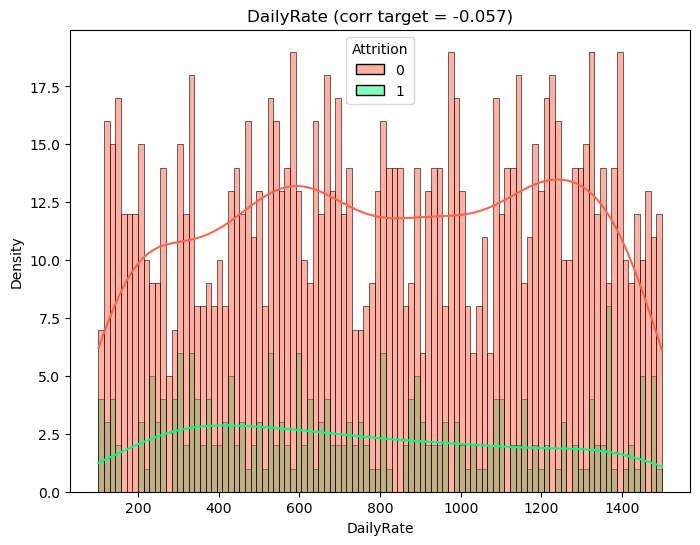

In [22]:
plot_distribution('DailyRate',100)

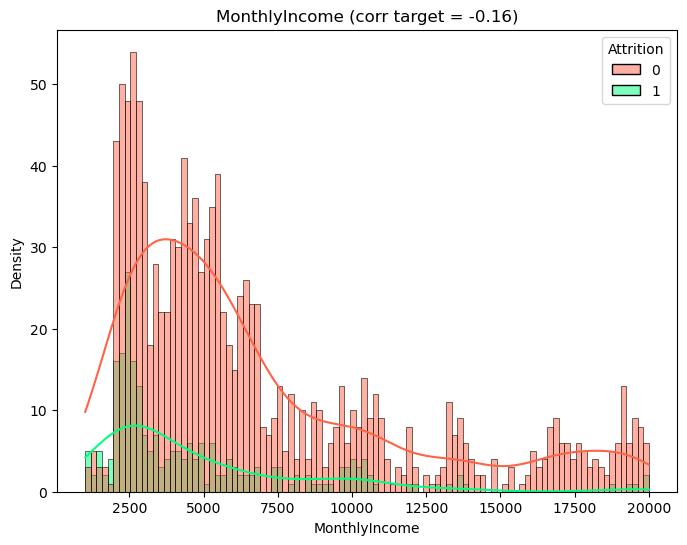

In [23]:
plot_distribution('MonthlyIncome',100)

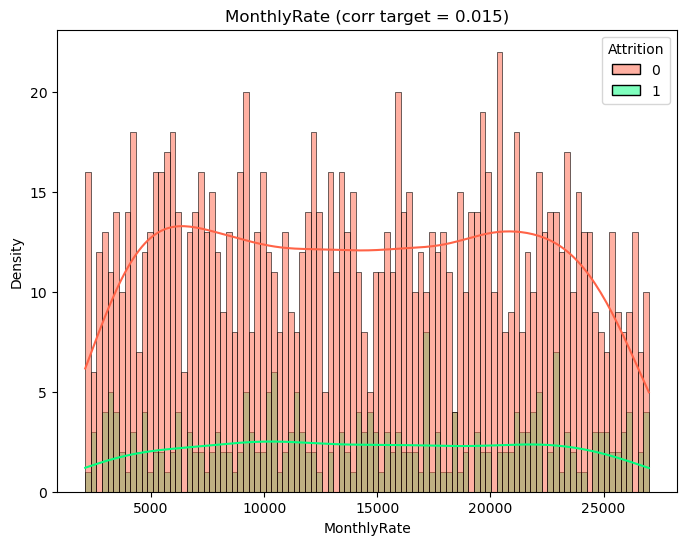

In [24]:
plot_distribution('MonthlyRate',100)

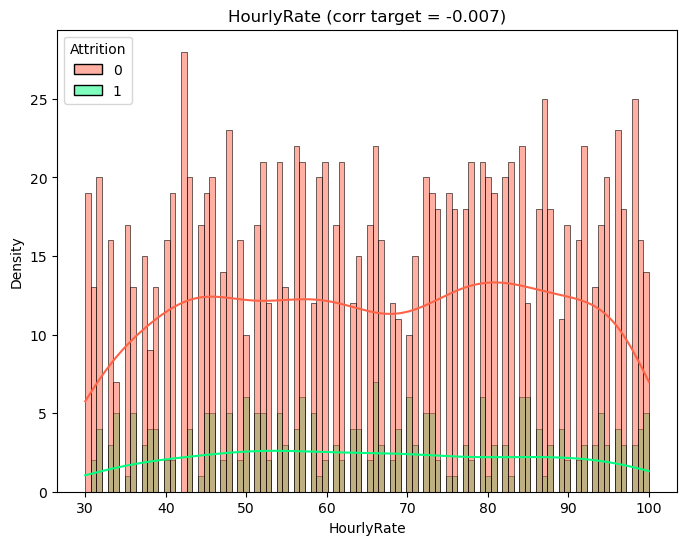

In [25]:
plot_distribution('HourlyRate',100)

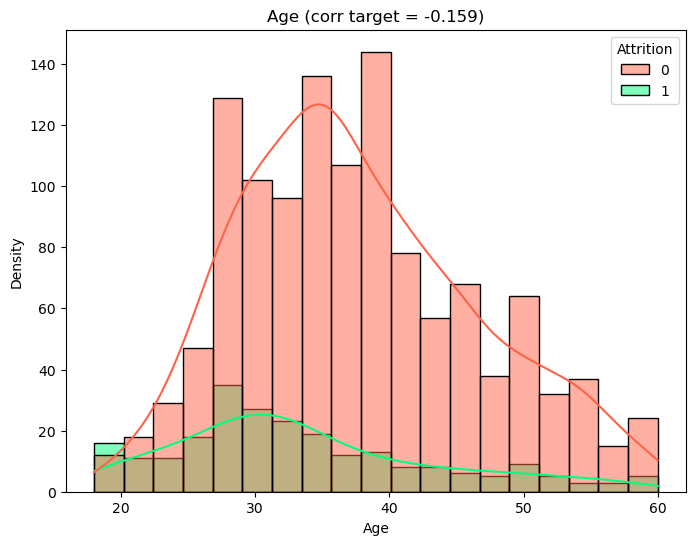

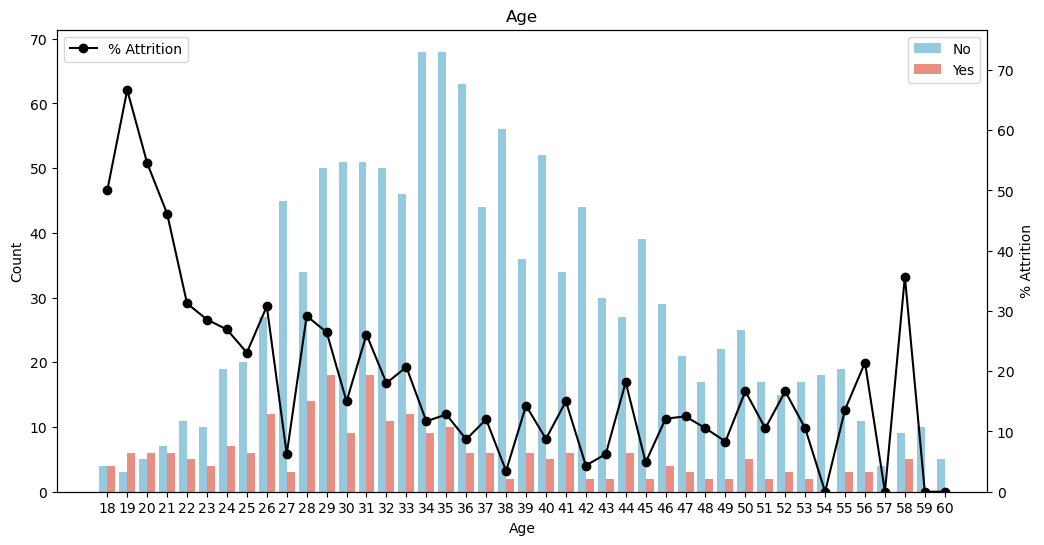

In [26]:
plot_distribution('Age')
plot_countplot_with_percentage('Age')

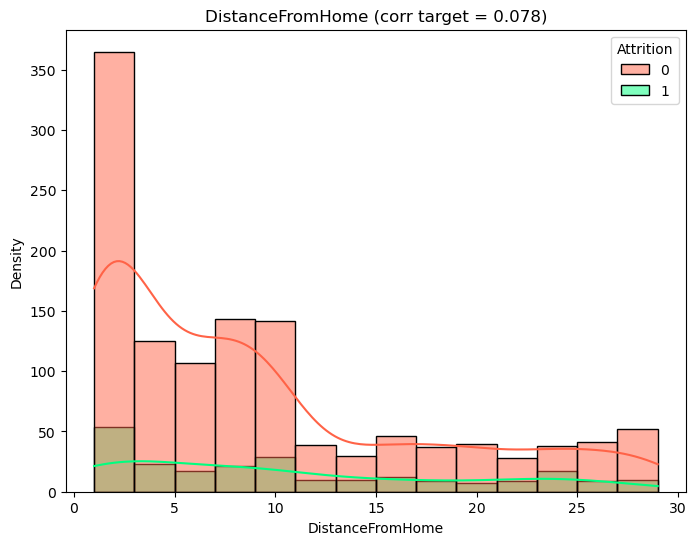

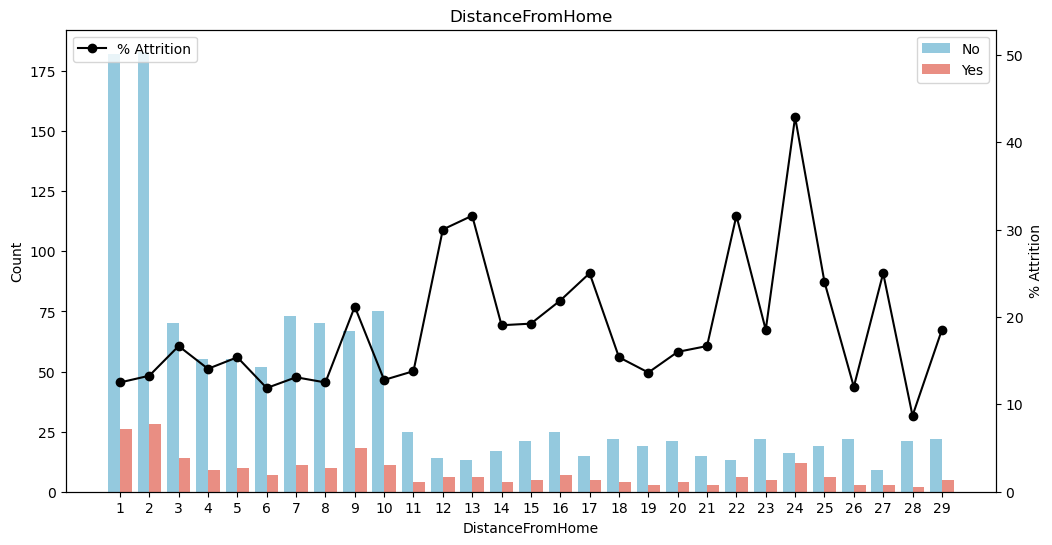

In [27]:
plot_distribution('DistanceFromHome')
plot_countplot_with_percentage('DistanceFromHome')

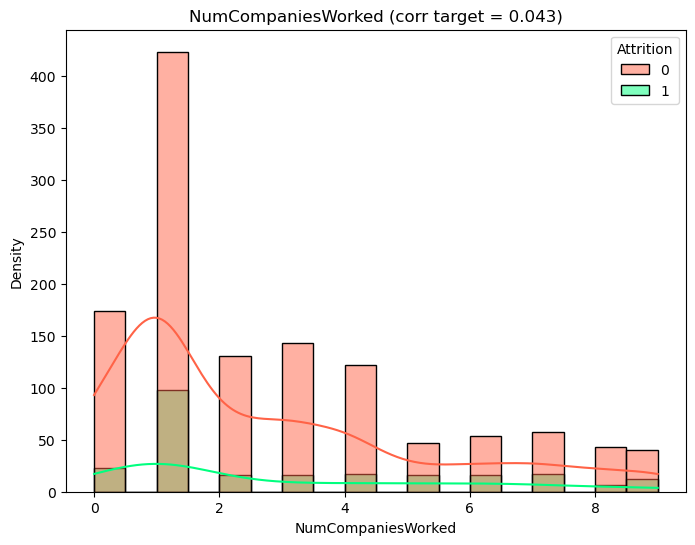

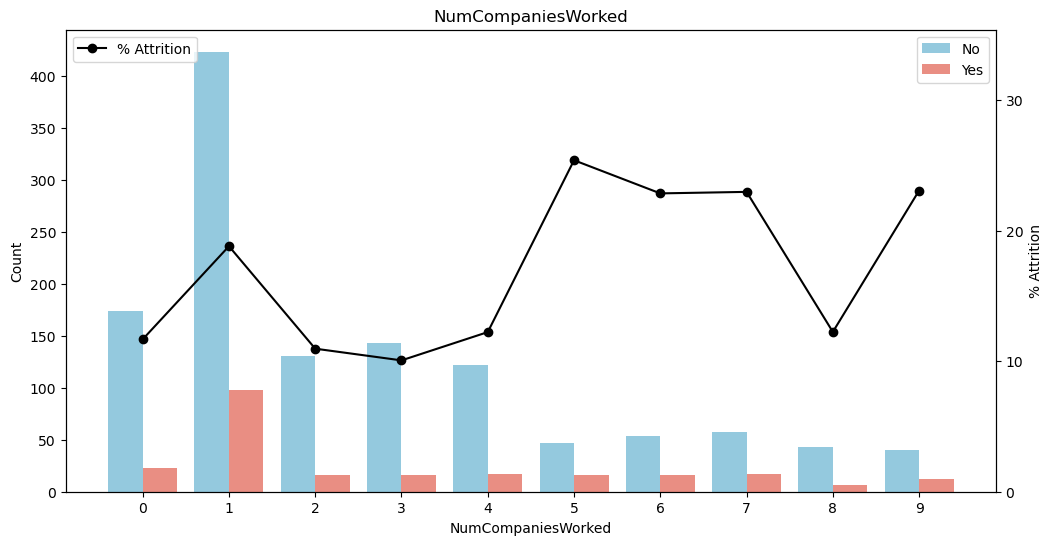

In [28]:
plot_distribution('NumCompaniesWorked')
plot_countplot_with_percentage('NumCompaniesWorked')

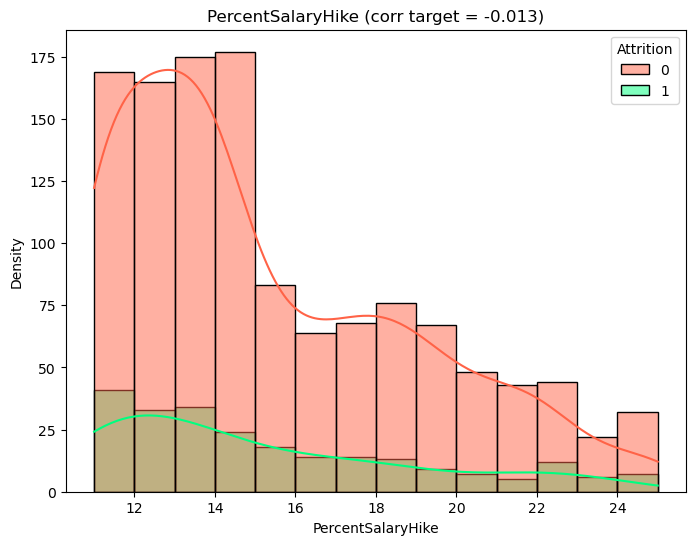

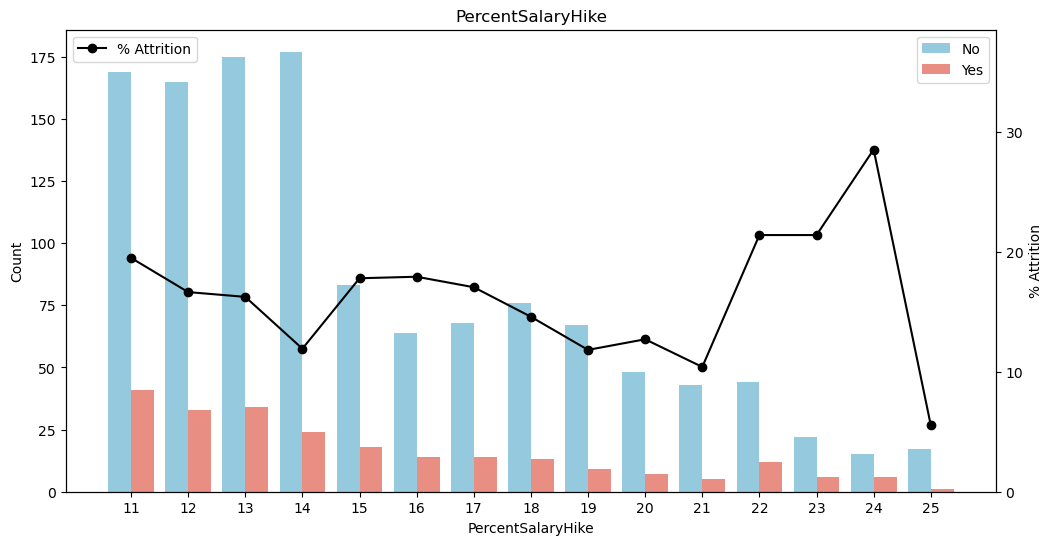

In [29]:
plot_distribution('PercentSalaryHike')
plot_countplot_with_percentage('PercentSalaryHike')

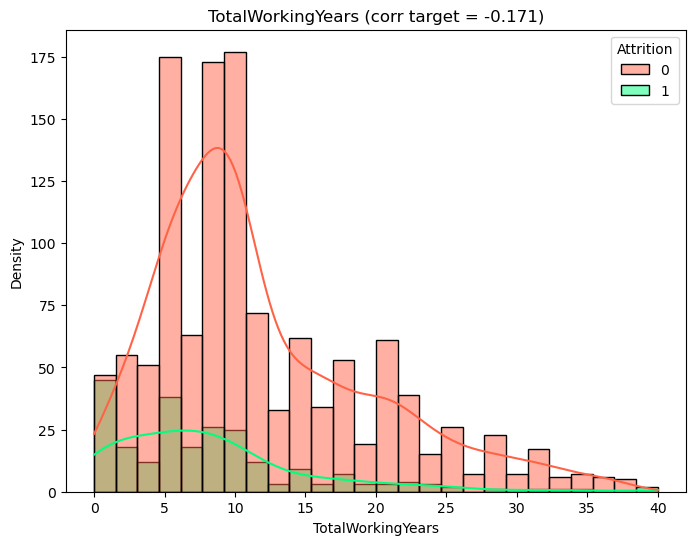

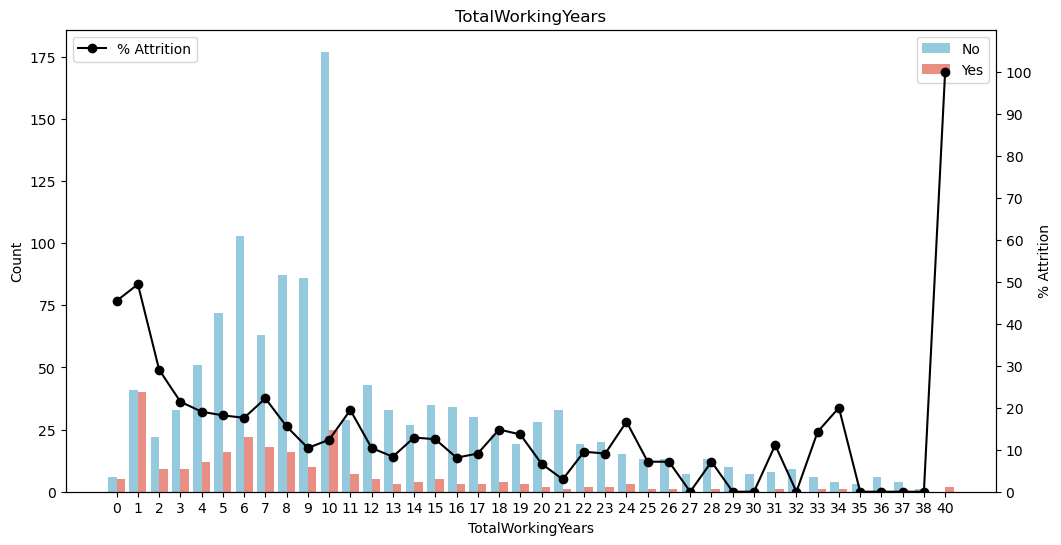

In [30]:
plot_distribution('TotalWorkingYears')
plot_countplot_with_percentage('TotalWorkingYears')

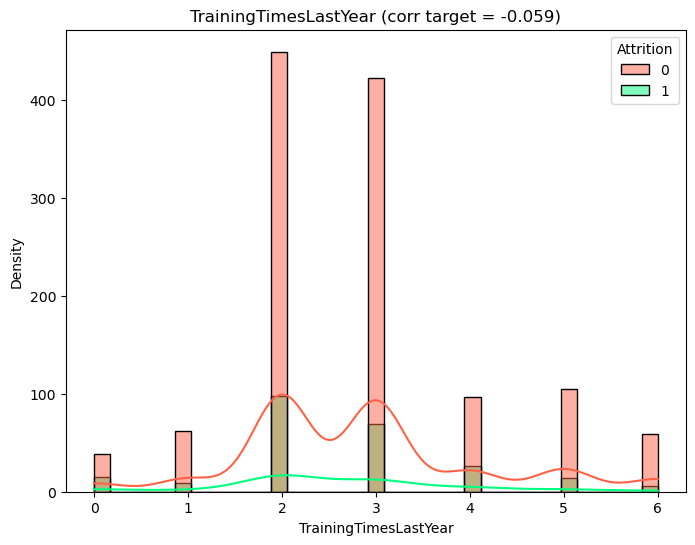

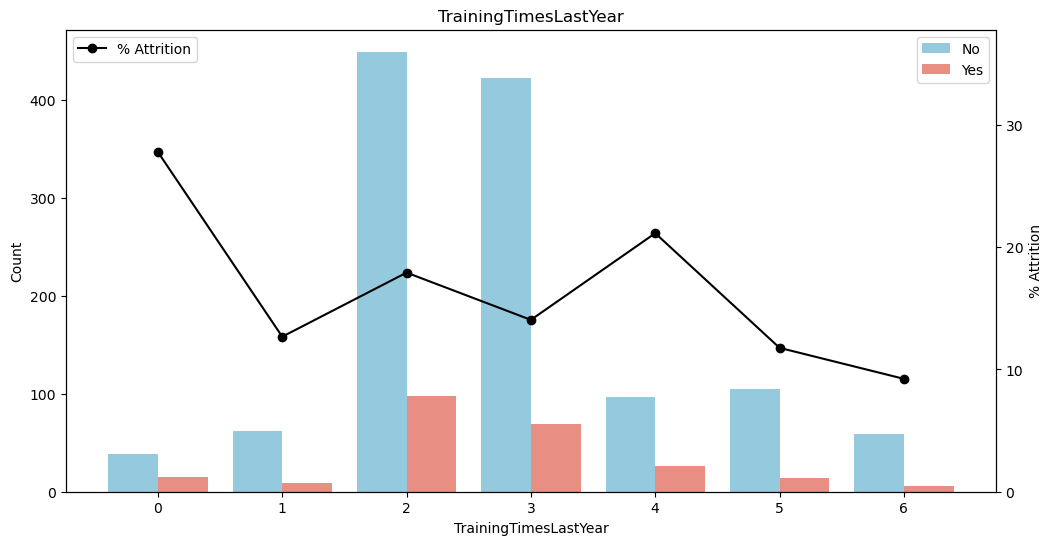

In [31]:
plot_distribution('TrainingTimesLastYear')
plot_countplot_with_percentage('TrainingTimesLastYear')

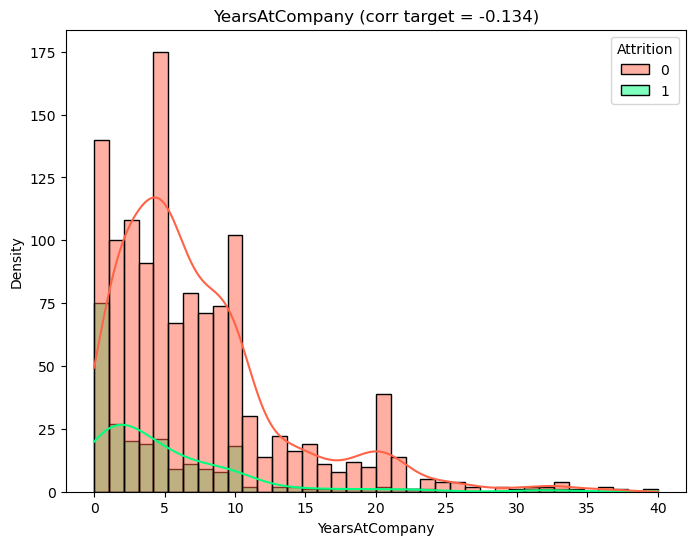

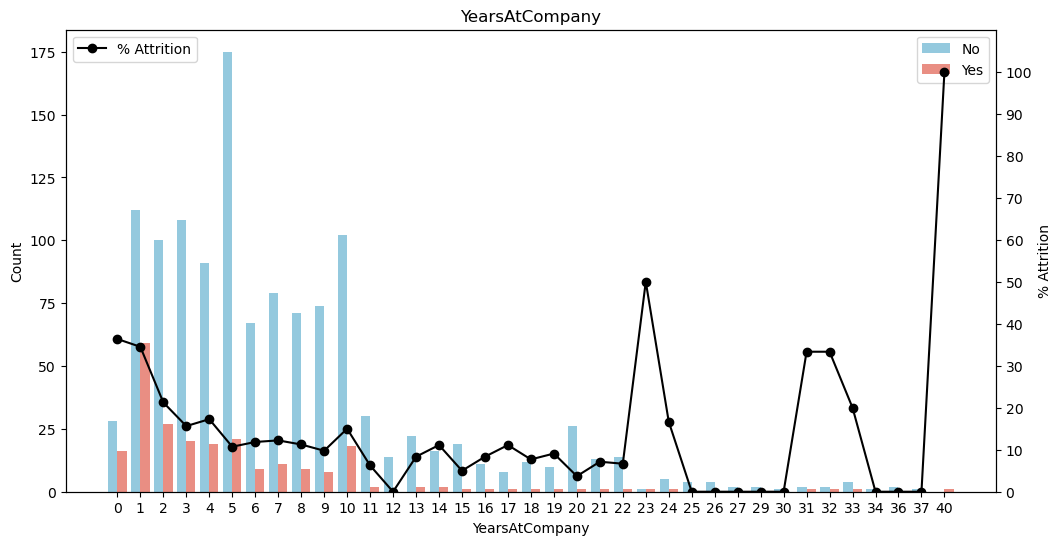

In [32]:
plot_distribution('YearsAtCompany')
plot_countplot_with_percentage('YearsAtCompany')

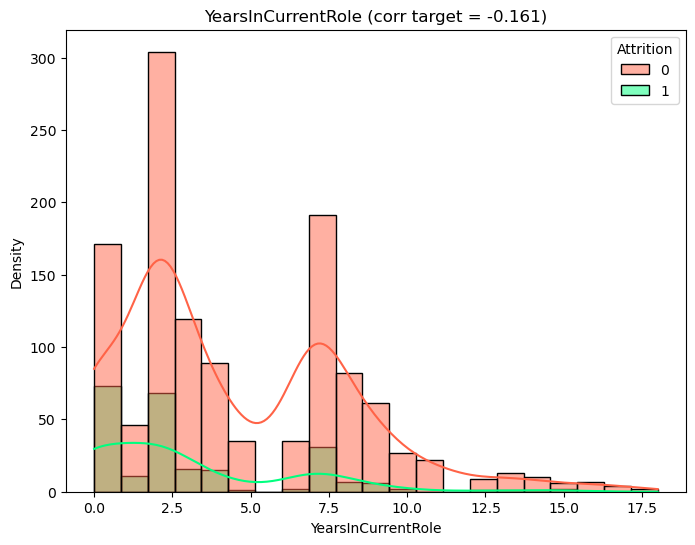

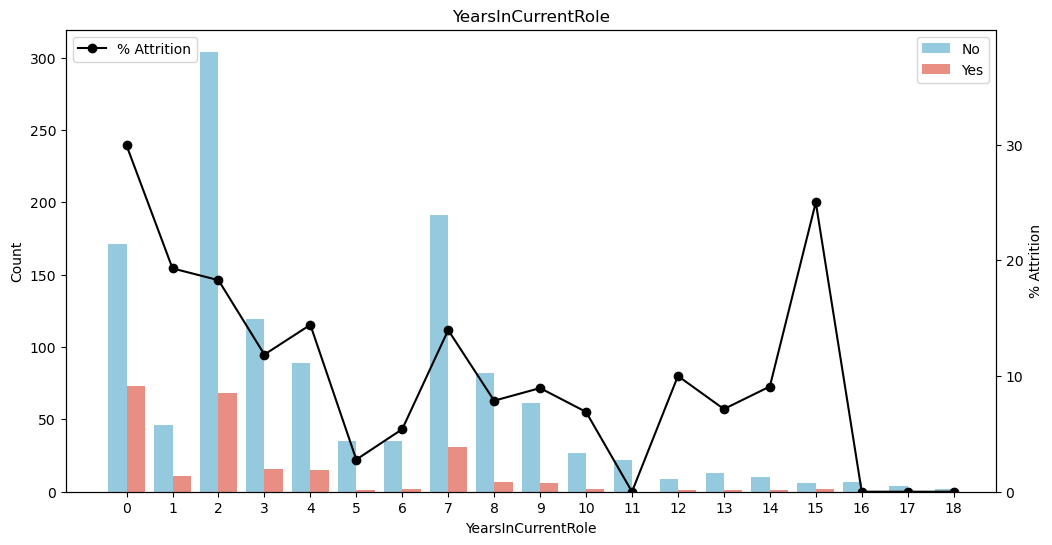

In [33]:
plot_distribution('YearsInCurrentRole')
plot_countplot_with_percentage('YearsInCurrentRole')

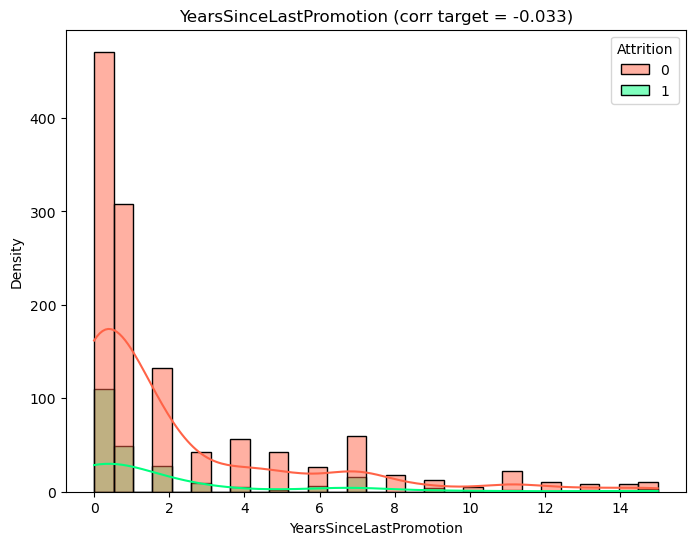

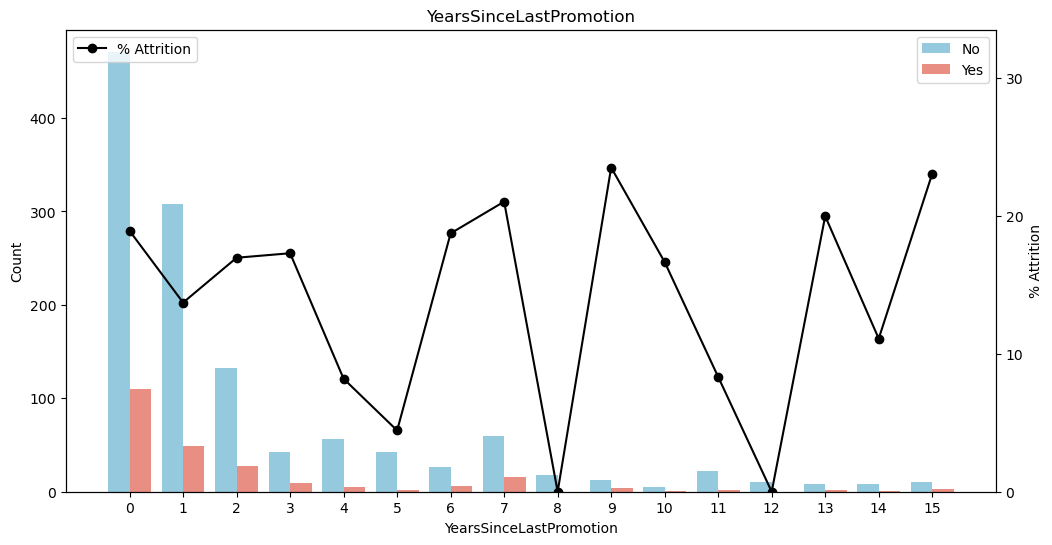

In [34]:
plot_distribution('YearsSinceLastPromotion')
plot_countplot_with_percentage('YearsSinceLastPromotion')

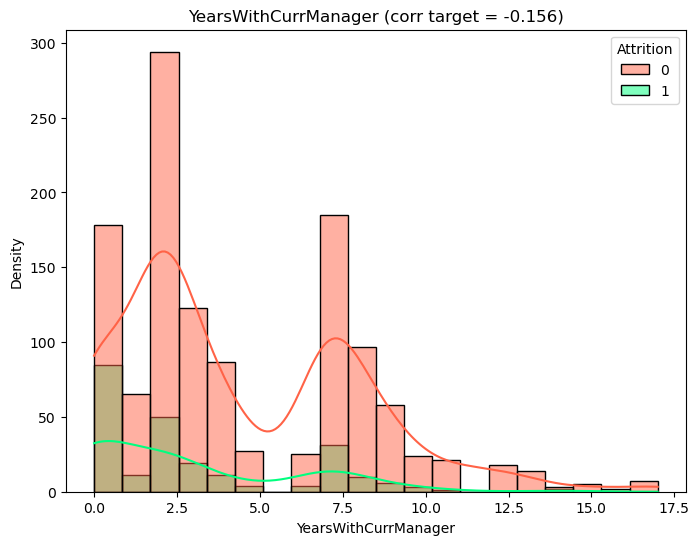

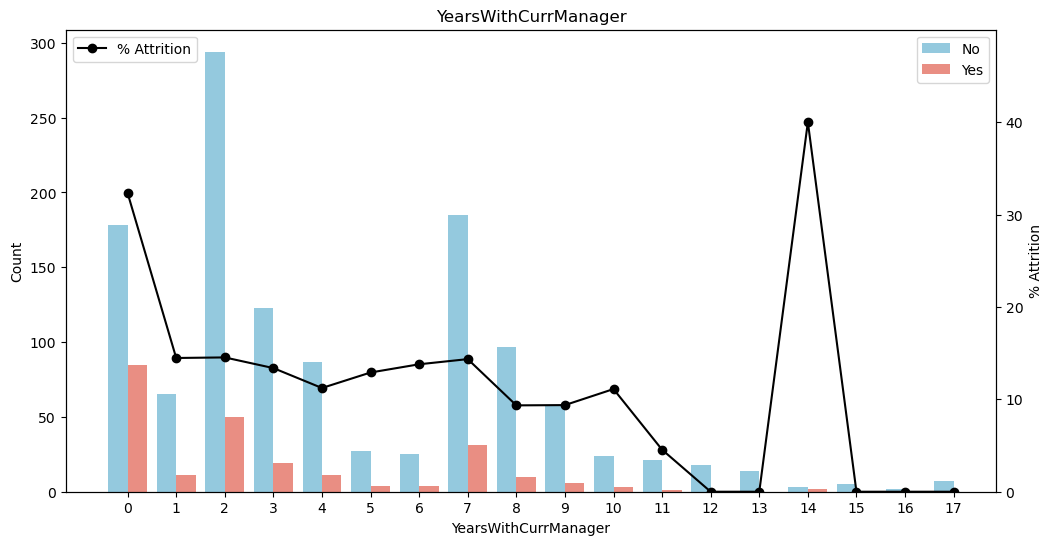

In [35]:
plot_distribution('YearsWithCurrManager')
plot_countplot_with_percentage('YearsWithCurrManager')

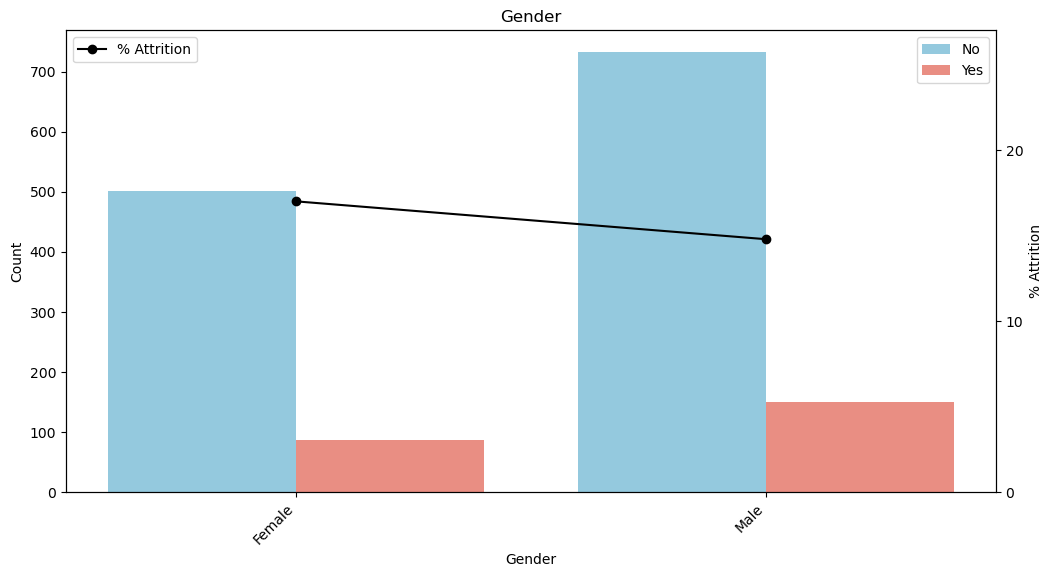

In [36]:
plot_countplot_with_percentage('Gender',True)

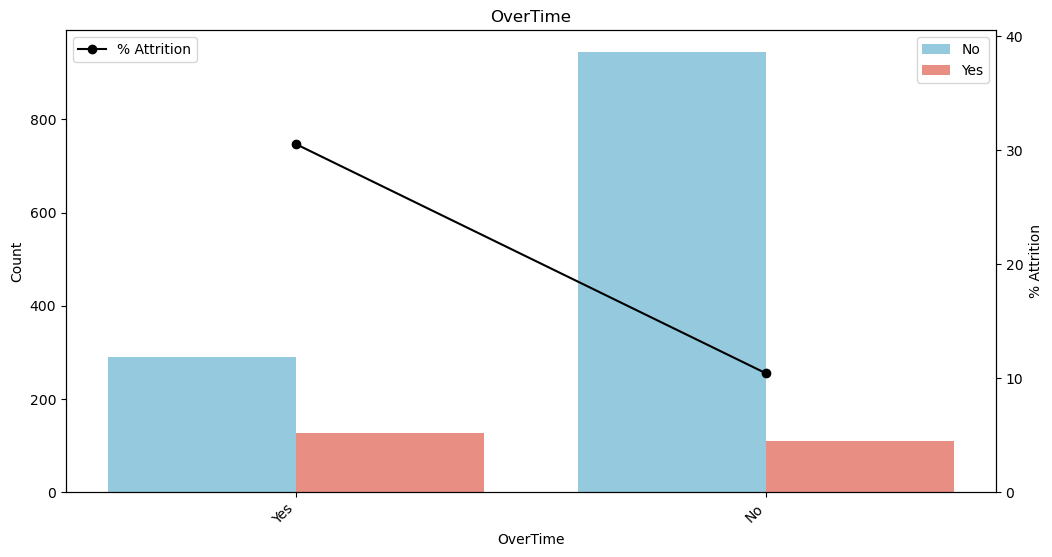

In [37]:
plot_countplot_with_percentage('OverTime',True)

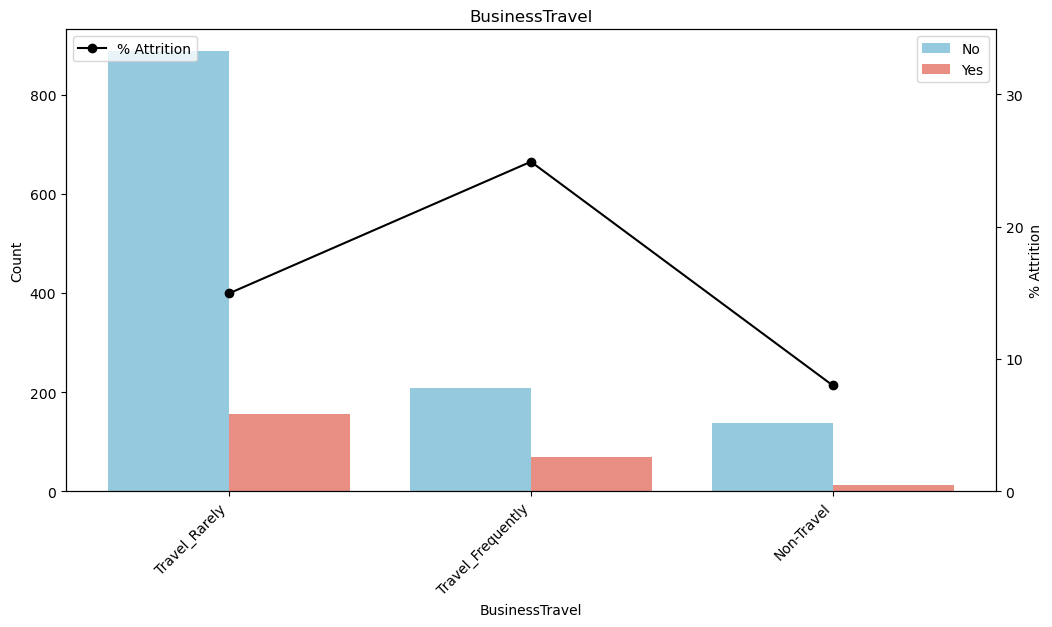

In [38]:
plot_countplot_with_percentage('BusinessTravel',True)

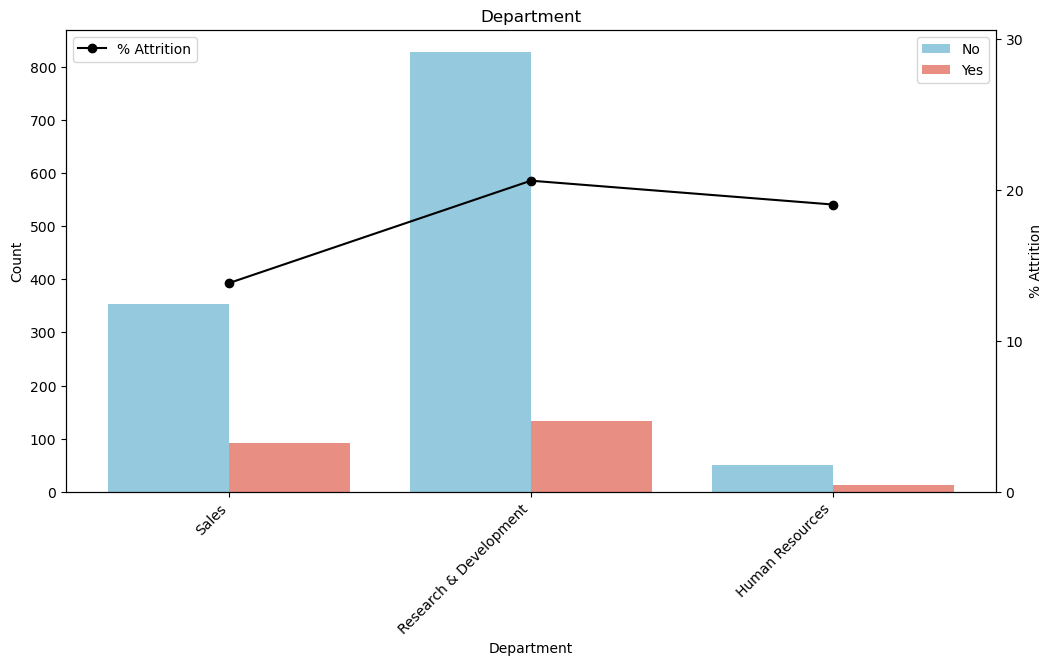

In [39]:
plot_countplot_with_percentage('Department',True)

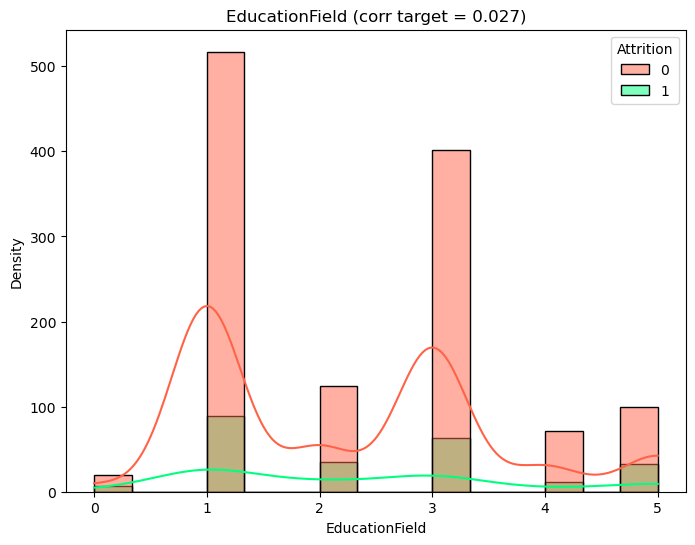

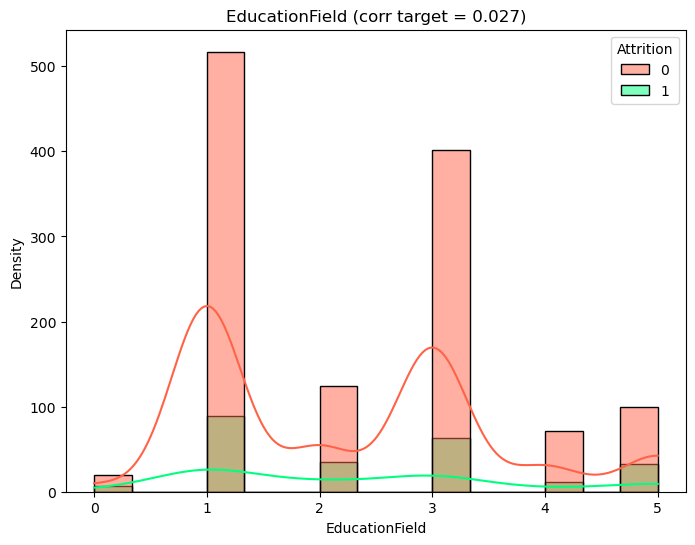

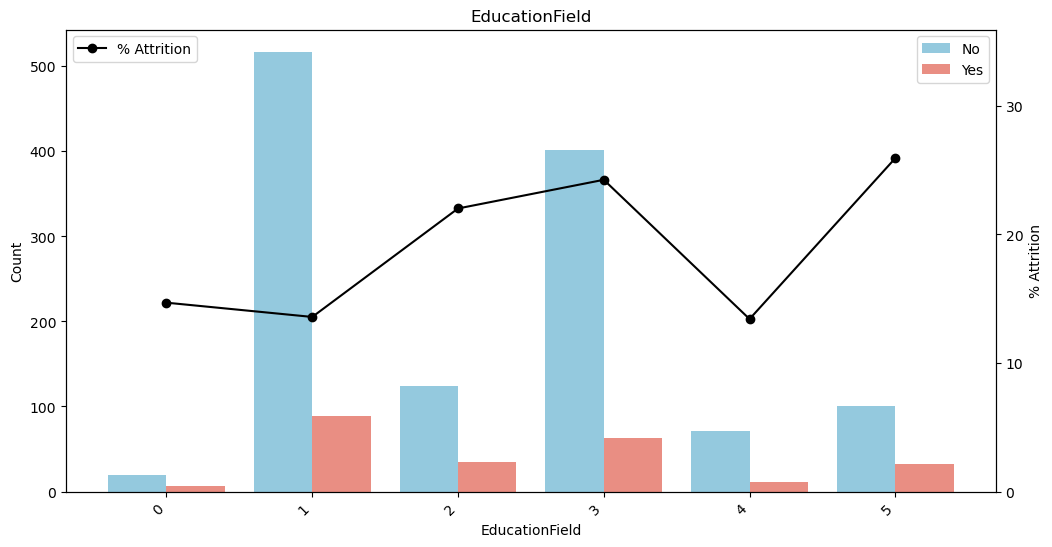

In [116]:
plot_distribution('EducationField')
plot_countplot_with_percentage('EducationField',True)


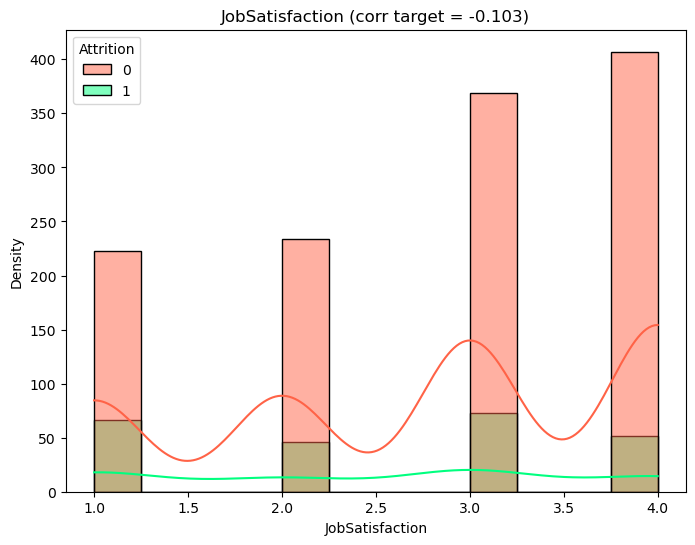

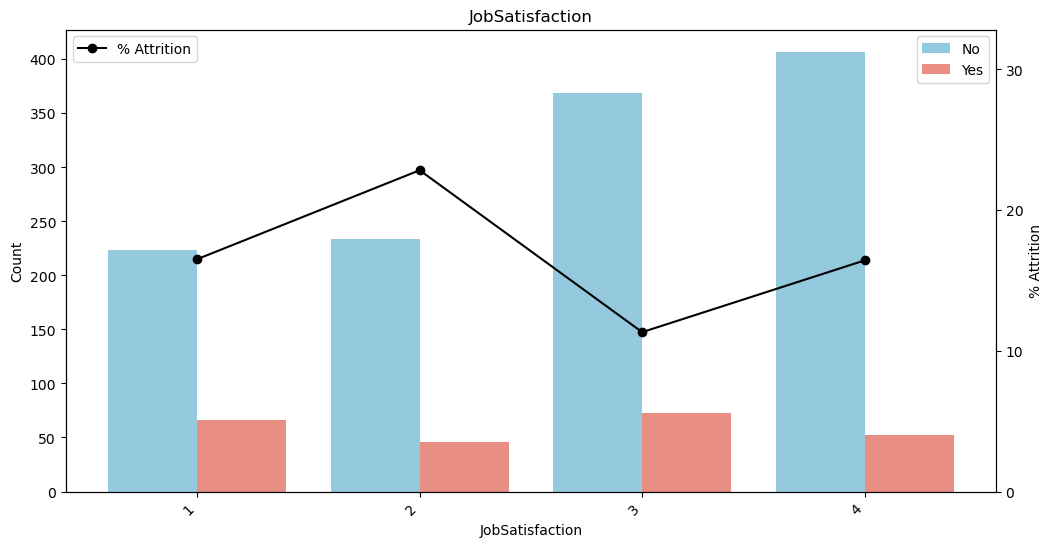

In [117]:
plot_distribution('JobSatisfaction')
plot_countplot_with_percentage('JobSatisfaction',True)


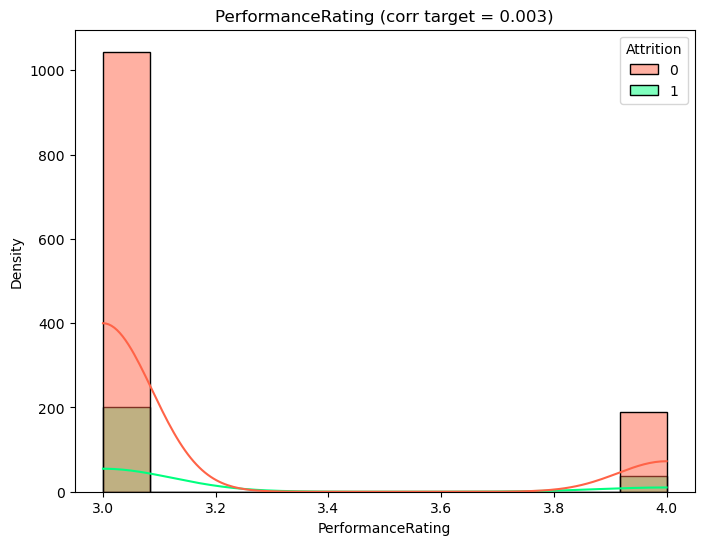

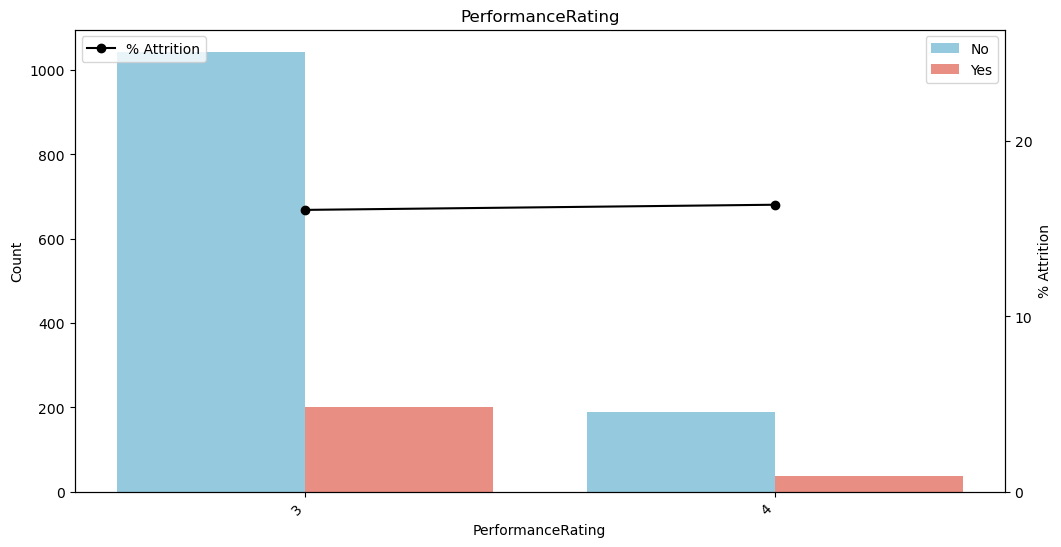

In [118]:
plot_distribution('PerformanceRating')
plot_countplot_with_percentage('PerformanceRating',True)


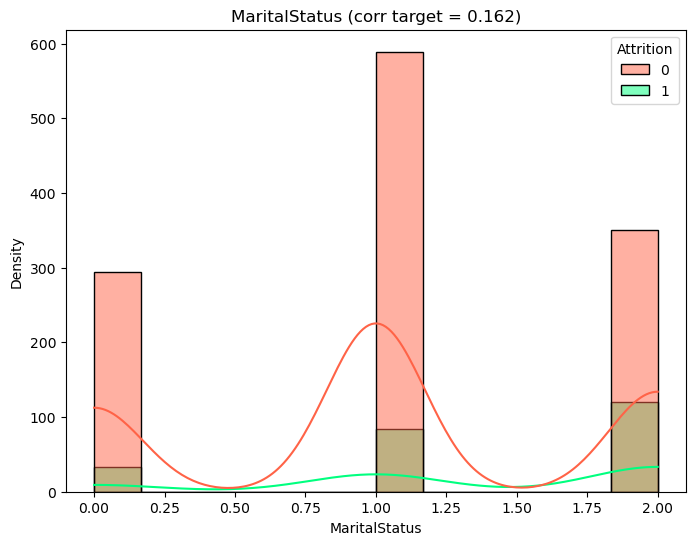

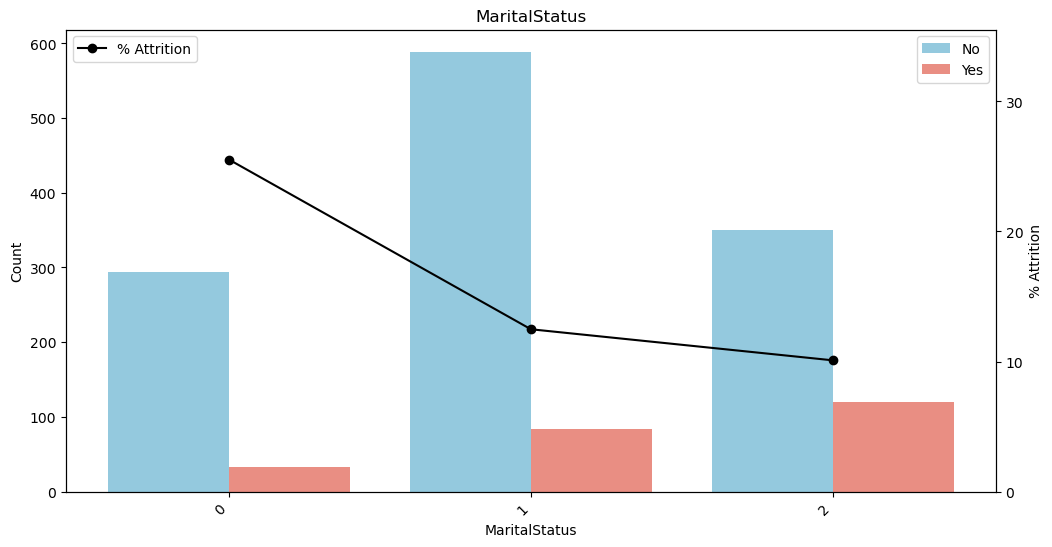

In [119]:
plot_distribution('MaritalStatus')

plot_countplot_with_percentage('MaritalStatus',True)


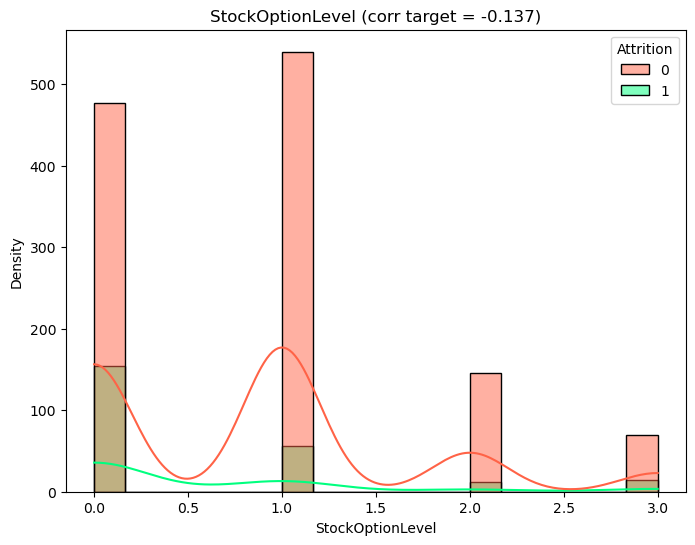

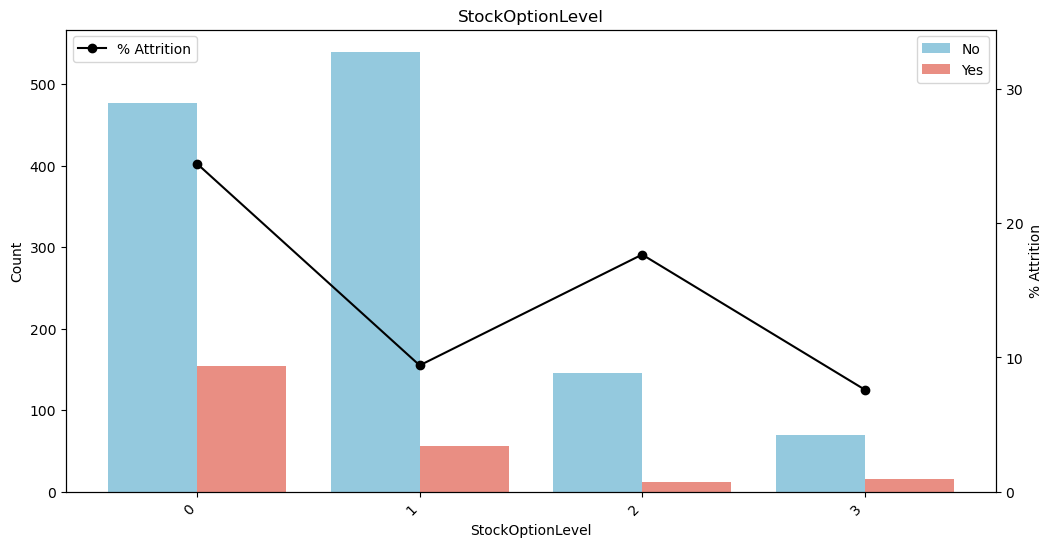

In [120]:
plot_distribution('StockOptionLevel')

plot_countplot_with_percentage('StockOptionLevel',True)


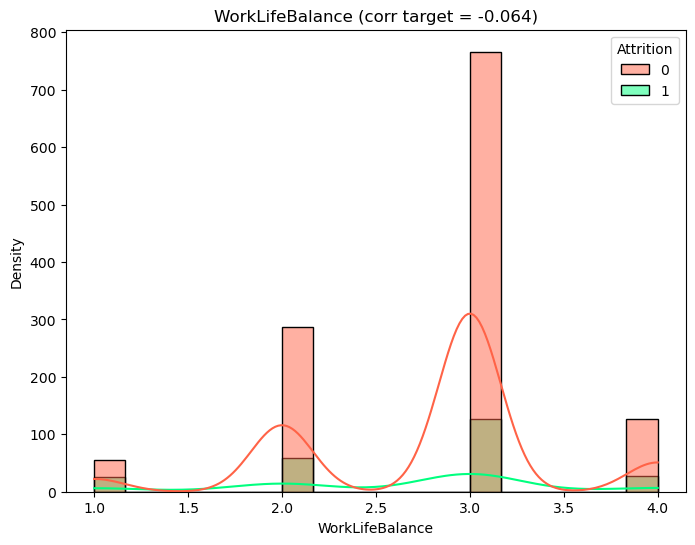

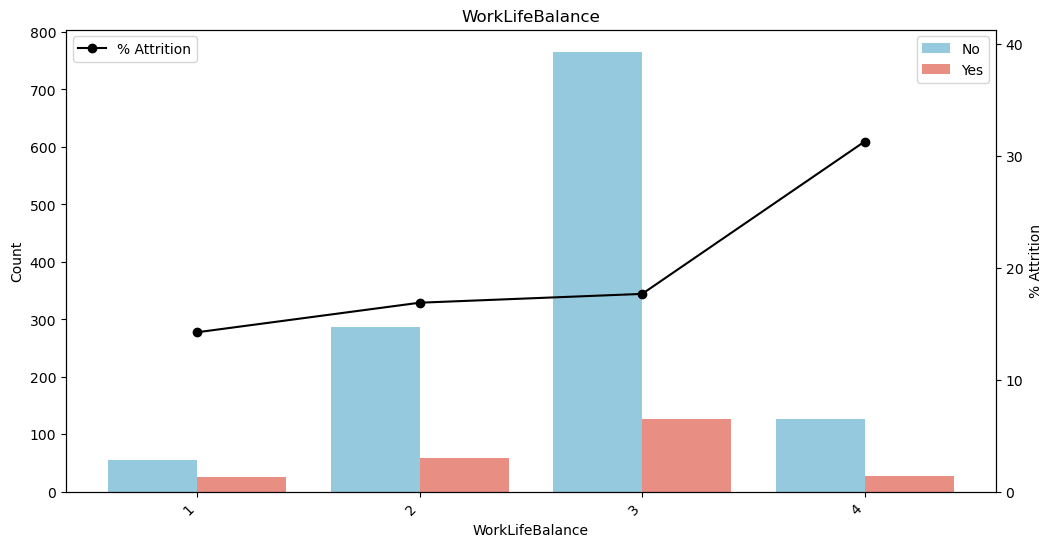

In [121]:
plot_distribution('WorkLifeBalance')

plot_countplot_with_percentage('WorkLifeBalance',True)


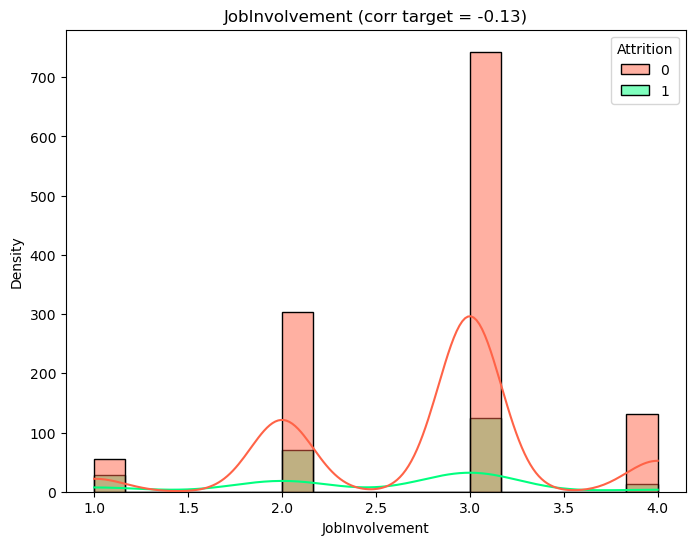

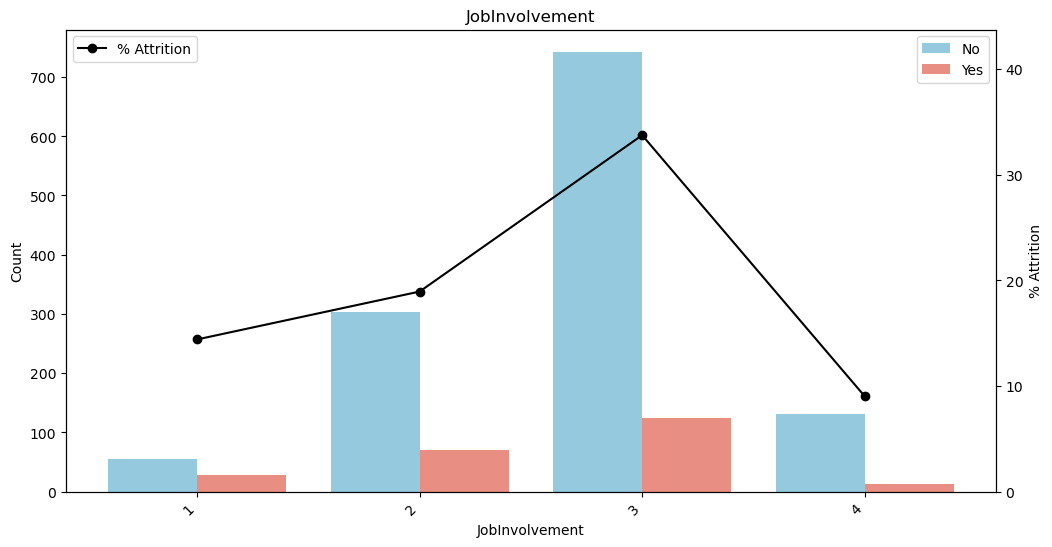

In [122]:
plot_distribution('JobInvolvement')

plot_countplot_with_percentage('JobInvolvement',True)


<AxesSubplot:>

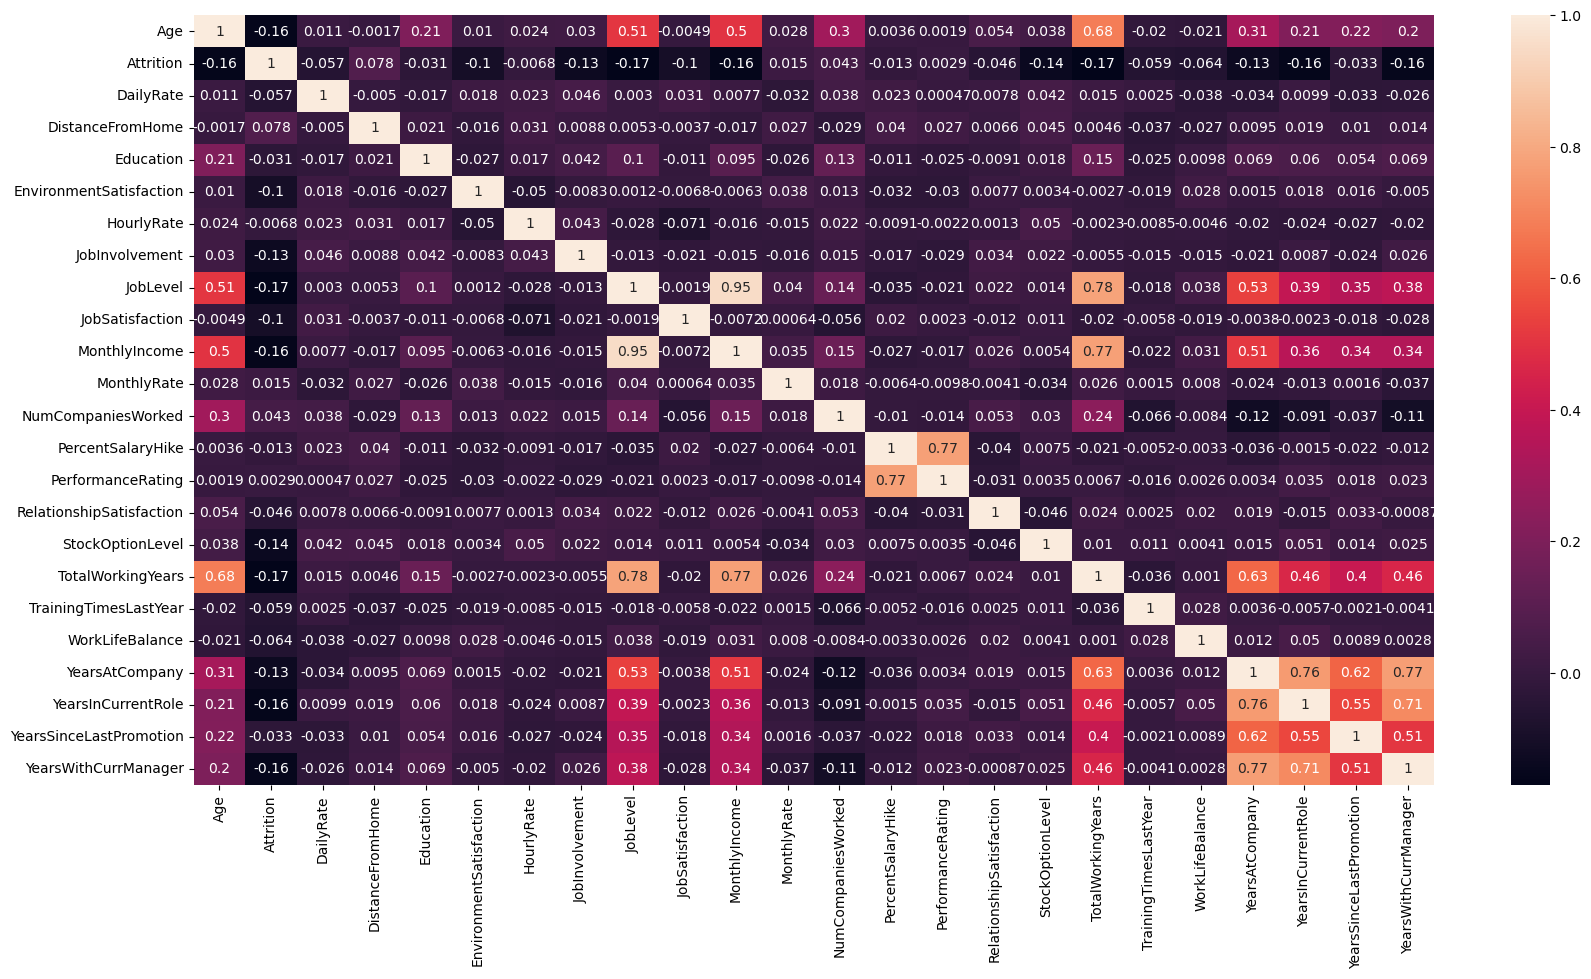

In [47]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(),annot=True,square=False)

In [48]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['OverTime'] = df['OverTime'].map({'Yes':1,'No':0})


In [87]:
le = LabelEncoder()
for i in (categorical_features):
    if type(df[i][0]) == str:
        df[i] = le.fit_transform(df[i])

In [89]:
X = df.drop(['Attrition'],axis=1)

In [90]:
y = df['Attrition']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=11)

In [92]:
smoteTomek = SMOTETomek(random_state=48)
X_train, y_train = smoteTomek.fit_resample(X_train,y_train)

In [93]:
y_train.value_counts()

0    915
1    915
Name: Attrition, dtype: int64

In [94]:
feautre_sel_df = X_train.copy(deep=True)
feautre_sel_df['Attrition'] = y_train

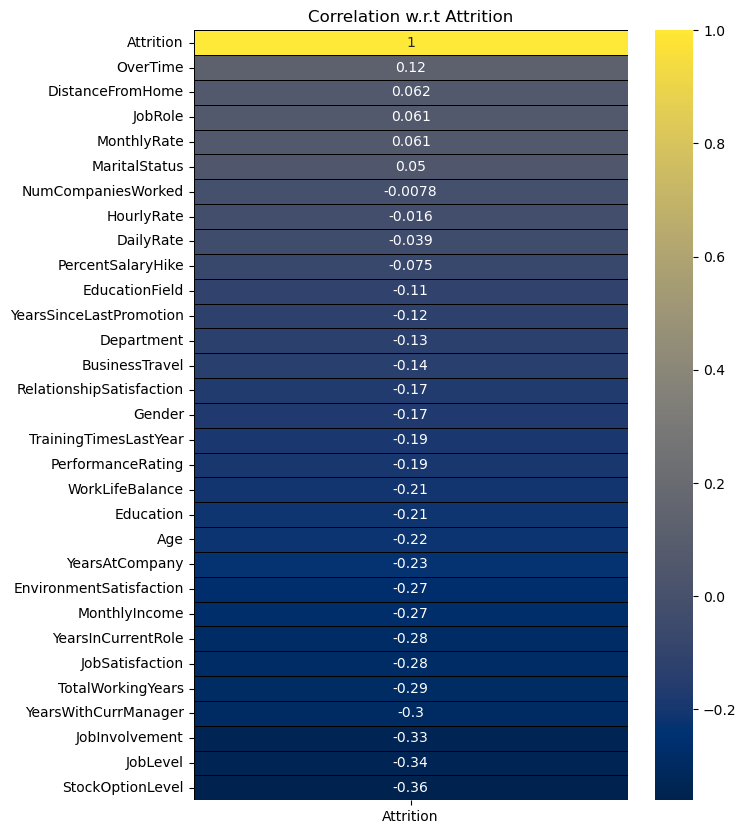

In [95]:
corr = feautre_sel_df.corrwith(feautre_sel_df['Attrition']).sort_values(ascending = False).to_frame()
corr.columns = ['Attrition']
plt.subplots(figsize = (7,10))
sns.heatmap(corr,annot = True,cmap='cividis',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Attrition');

### Feature Selection

#### 1. ChiSqaure Test

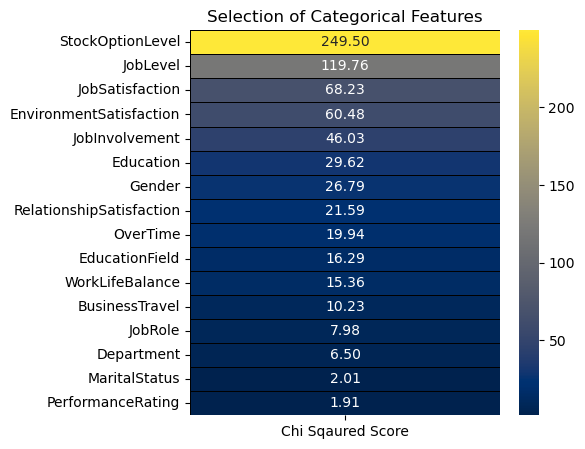

In [108]:
features = X_train.loc[:,categorical_features[1:]]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Sqaured Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Sqaured Score'),annot = True,cmap = 'cividis',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

#### 2. ANOVA Test

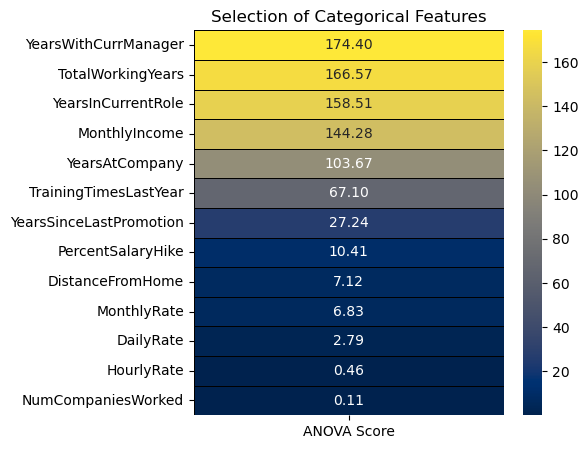

In [112]:
features = X_train.loc[:,discrete_features[1:]]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = 'cividis',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

In [113]:
X_train = X_train.drop(columns = ['MonthlyRate', 'HourlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 
                                  'YearsSinceLastPromotion', 'DistanceFromHome','DailyRate',
                                  'PerformanceRating', 'Department', 'JobRole', 'EducationField', 
                                  'BusinessTravel', 'MaritalStatus' ,'Gender'])

X_test = X_test.drop(columns = ['MonthlyRate', 'HourlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 
                                  'YearsSinceLastPromotion', 'DistanceFromHome','DailyRate',
                                  'PerformanceRating', 'Department', 'JobRole', 'EducationField', 
                                  'BusinessTravel', 'MaritalStatus' ,'Gender'])

In [125]:
norm_features = ['MonthlyIncome','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager']
std_features = ['Age','Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','OverTime','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance']

In [126]:
std = StandardScaler()
norm = MinMaxScaler()

In [127]:
for feature in norm_features:
    X_train[feature] = norm.fit_transform(X_train[[feature]])
    X_test[feature] = norm.transform(X_test[[feature]])
    
    
for feature in std_features:
    X_train[feature] = std.fit_transform(X_train[[feature]])
    X_test[feature] = std.transform(X_test[[feature]])

In [289]:
def calculate_metrics(y_true, y_pred, cm):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    tn, fp, fn, tp = cm.ravel()
    tp_rate = tp / (tp + fn)
    fp_rate = fp / (fp + tn)
    tn_rate = tn / (tn + fp)
    fn_rate = fn / (fn + tp)

    result_list = [accuracy, precision, recall, f1, tp_rate, fp_rate, tn_rate, fn_rate]
    return result_list

In [290]:
def plot_feature_importance(classifier, x_train):
    if hasattr(classifier, 'feature_importances_'):
        feature_importances = classifier.feature_importances_
        features = x_train.columns

        sorted_idx = np.argsort(feature_importances)[::-1]

        plt.figure(figsize=(10, 6))
        plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align='center')
        plt.xticks(range(len(feature_importances)), np.array(features)[sorted_idx], rotation=90)
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.title('Feature Importance')
        plt.show()



In [303]:
def model(name,classifier, x_train, x_test, y_train, y_test):
    
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    cross_val_auc = cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()
    roc_auc = roc_auc_score(y_test, prediction)

    plot_roc_curve(classifier, x_test, y_test)

    plot_feature_importance(classifier, x_train)

    print("\nClassification Report:\n")
    print(classification_report(y_test, classifier.predict(x_test)))

    cm = confusion_matrix(y_test, classifier.predict(x_test))
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, cmap='Blues', fmt='')
    plt.show()
   
    result_list = calculate_metrics(y_test, prediction, cm)
    return result_list


In [321]:
classifiers = [
    RandomForestClassifier(random_state=42),
    XGBClassifier(random_state=42),
    MLPClassifier(random_state=42),
    GaussianProcessClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42),
    LGBMClassifier(learning_rate=0.01, max_depth=3, n_estimators=1000),
    AdaBoostClassifier(random_state=48)
]

classifier_names = [
    'RandomForest',
    'XGBoost',
    'MLPClassifier',
    'GaussianProcess',
    'DecisionTree',
    'LGBMClassifier',
    'AdaBoostClassifier'
]

# Create a dictionary to store the results
results_dict = {}

### DecisionTreeClassfier

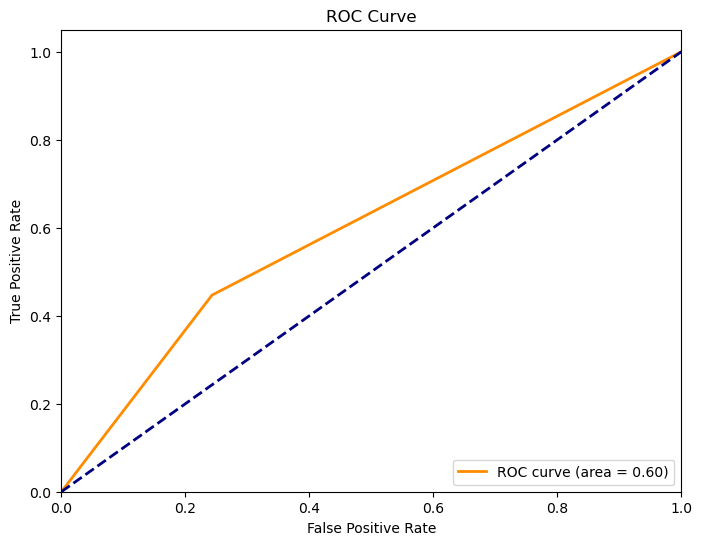

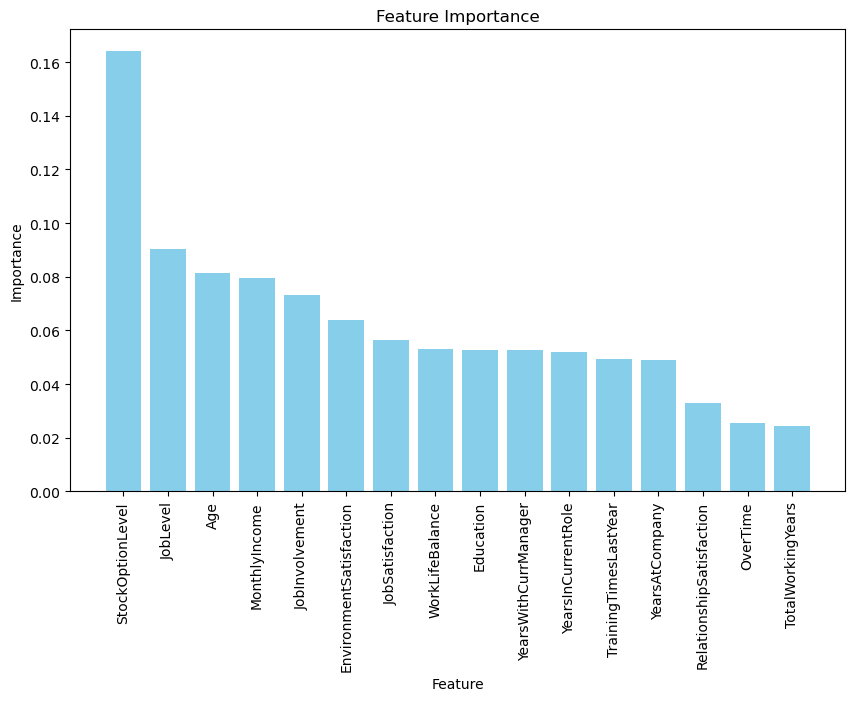


Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.76      0.81       247
           1       0.26      0.45      0.33        47

    accuracy                           0.71       294
   macro avg       0.57      0.60      0.57       294
weighted avg       0.78      0.71      0.74       294



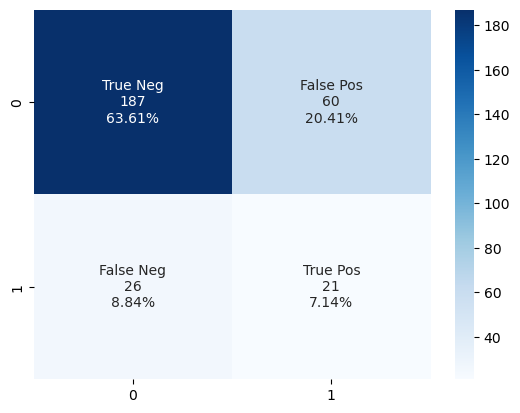

In [322]:
classifier_results = model('DecisionTree',DecisionTreeClassifier(random_state=42), X_train, X_test, y_train, y_test)
results_dict['DecisionTree'] = classifier_results

### RandomForest Classifier

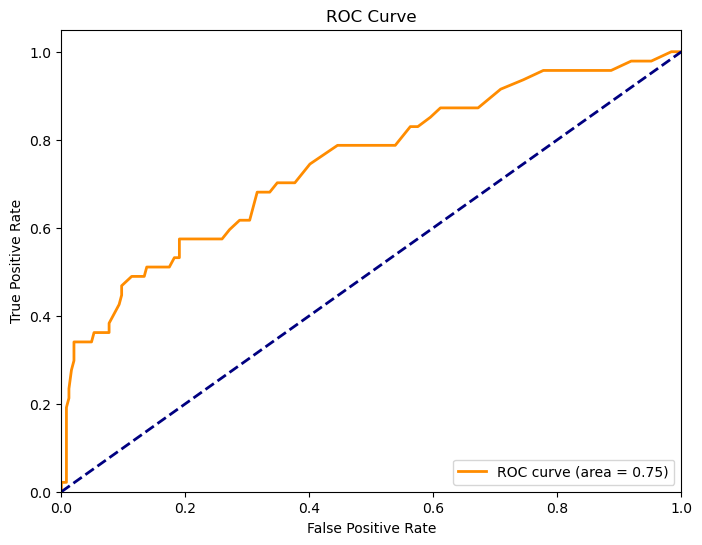

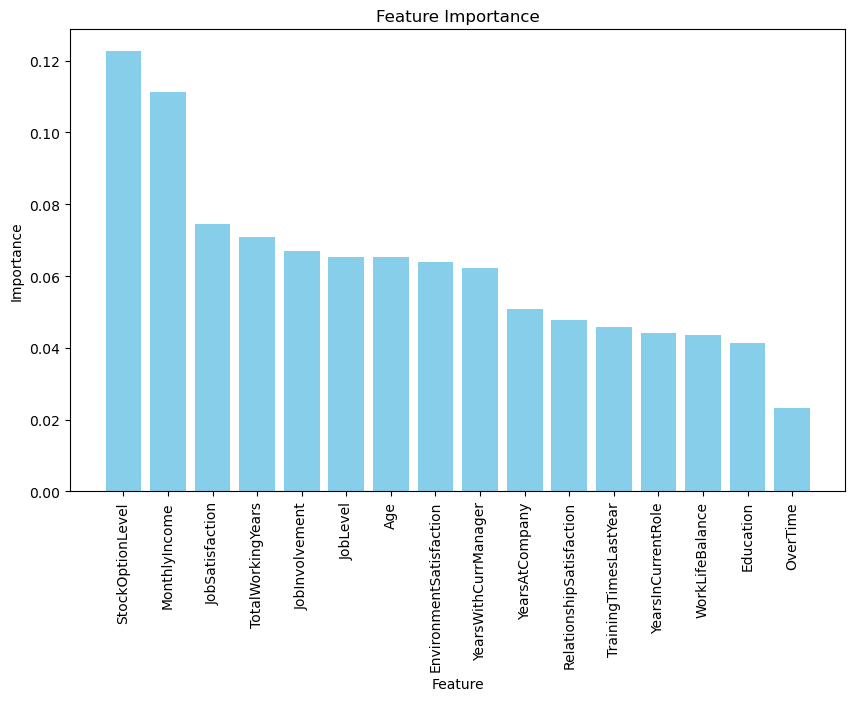


Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       247
           1       0.42      0.49      0.45        47

    accuracy                           0.81       294
   macro avg       0.66      0.68      0.67       294
weighted avg       0.82      0.81      0.82       294



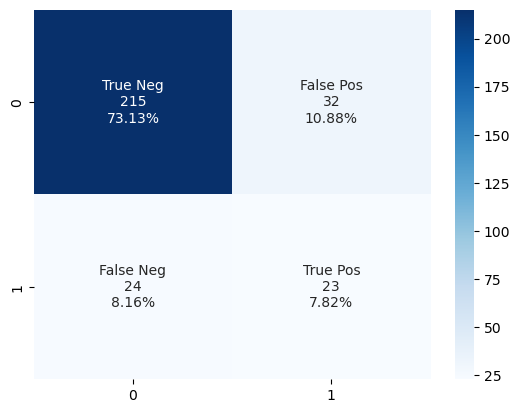

In [323]:
classifier_results = model('RandomForest',RandomForestClassifier(random_state=42), X_train, X_test, y_train, y_test)
results_dict['RandomForest'] = classifier_results


### XGBoost Classifier

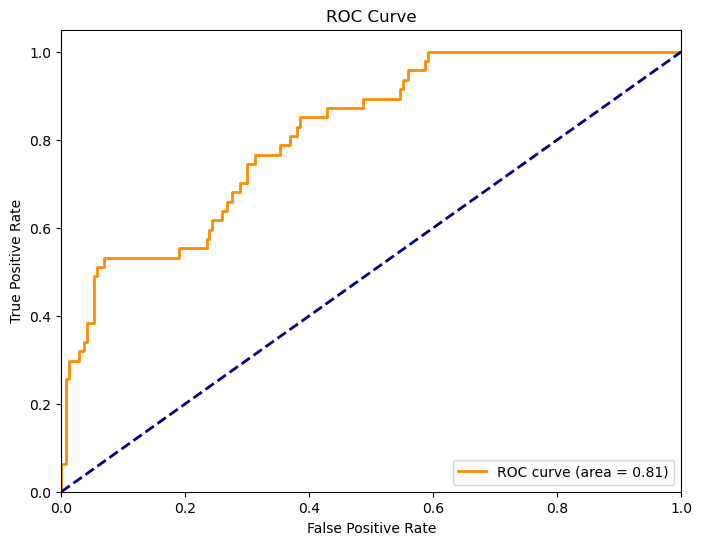

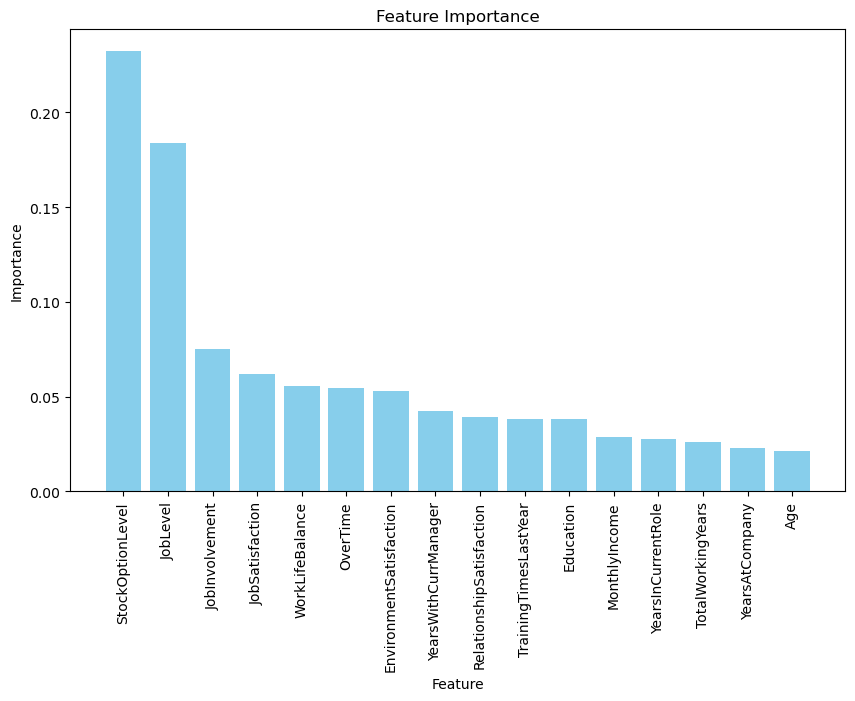


Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       247
           1       0.45      0.53      0.49        47

    accuracy                           0.82       294
   macro avg       0.68      0.71      0.69       294
weighted avg       0.84      0.82      0.83       294



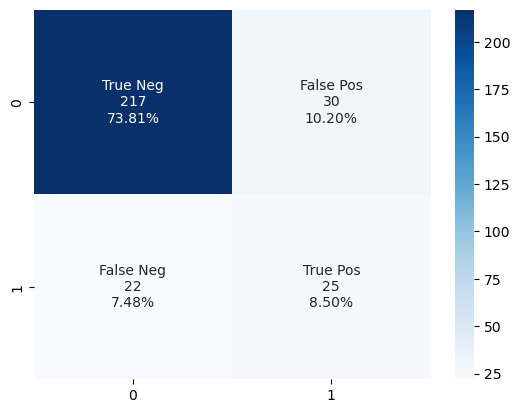

In [324]:
classifier_results = model('XGBoost',XGBClassifier(random_state=42), X_train, X_test, y_train, y_test)
results_dict['XGBoost'] = classifier_results

### GaussianProcess Classifier

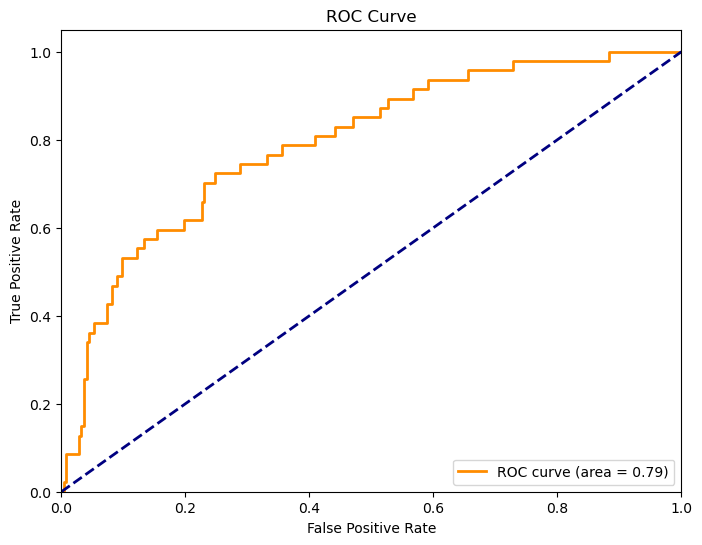


Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       247
           1       0.42      0.60      0.49        47

    accuracy                           0.80       294
   macro avg       0.67      0.72      0.68       294
weighted avg       0.84      0.80      0.82       294



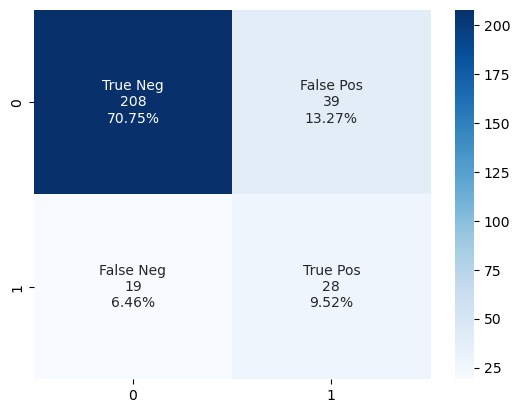

In [325]:
classifier_results = model('GaussianProcess',GaussianProcessClassifier(random_state=42), X_train, X_test, y_train, y_test)
results_dict['GaussianProcess'] = classifier_results

### MultiLayerPerceptron Classifier

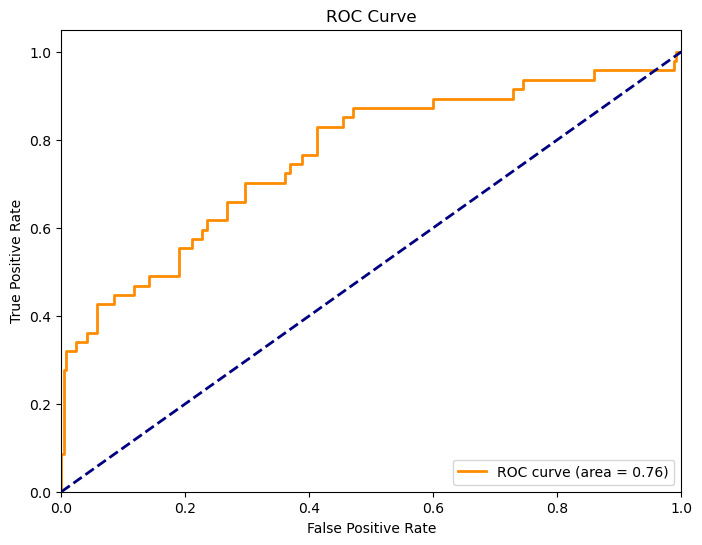


Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       247
           1       0.40      0.49      0.44        47

    accuracy                           0.80       294
   macro avg       0.65      0.67      0.66       294
weighted avg       0.82      0.80      0.81       294



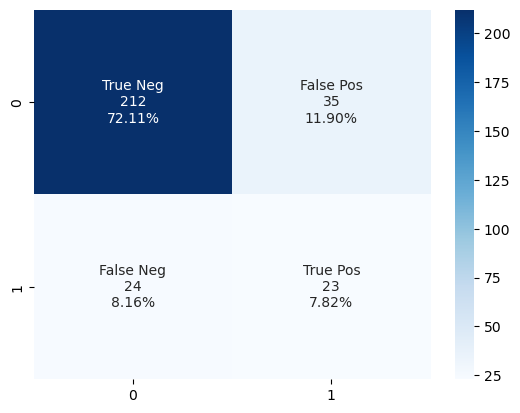

In [326]:
classifier_results = model('MLPClassifier',MLPClassifier(random_state=42), X_train, X_test, y_train, y_test)
results_dict['MLPClassifier'] = classifier_results

### LightGBMClassifier

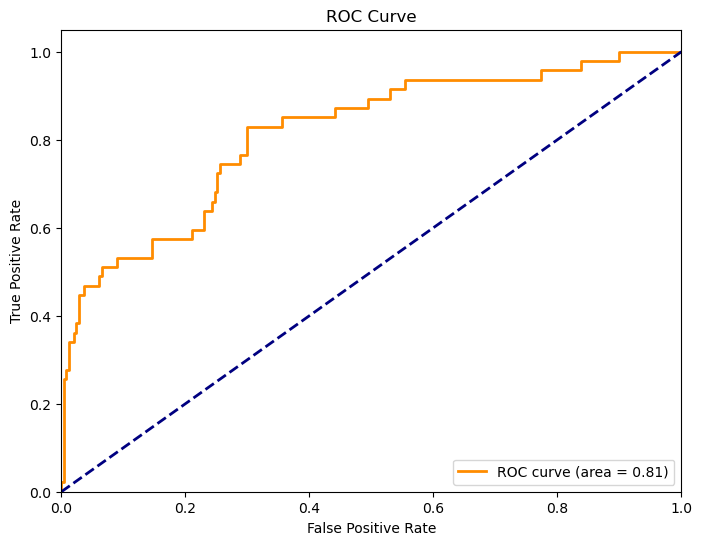

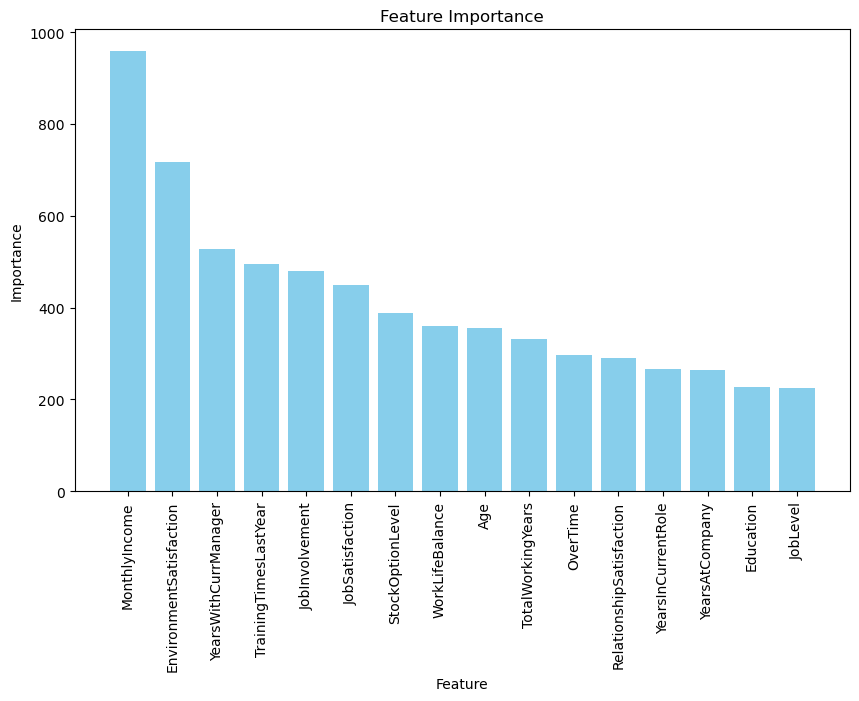


Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       247
           1       0.42      0.53      0.47        47

    accuracy                           0.81       294
   macro avg       0.67      0.70      0.68       294
weighted avg       0.83      0.81      0.82       294



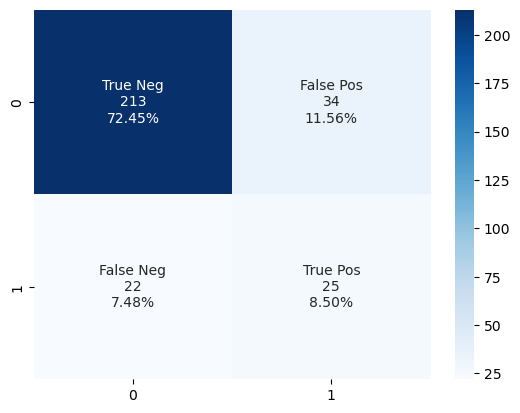

In [327]:
classifier_results = model('LGBMClassifier',LGBMClassifier(learning_rate=0.01, max_depth=3, n_estimators=1000), X_train, X_test, y_train, y_test)
results_dict['LGBMClassifier'] = classifier_results


### AdaBoostClassfier

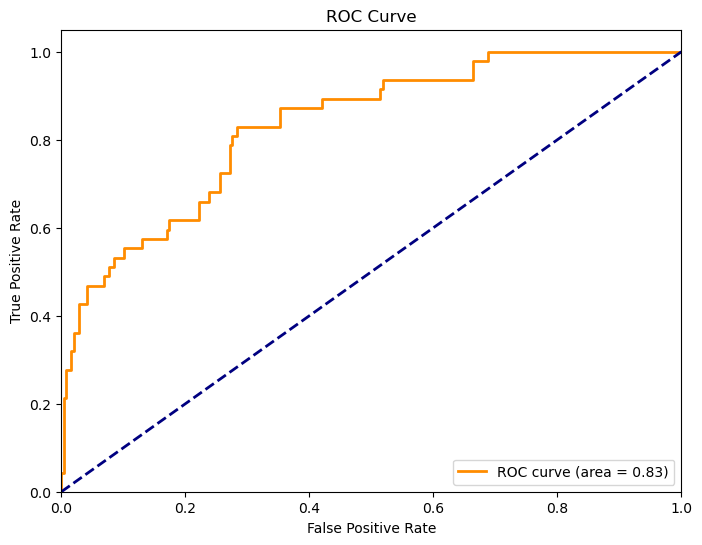

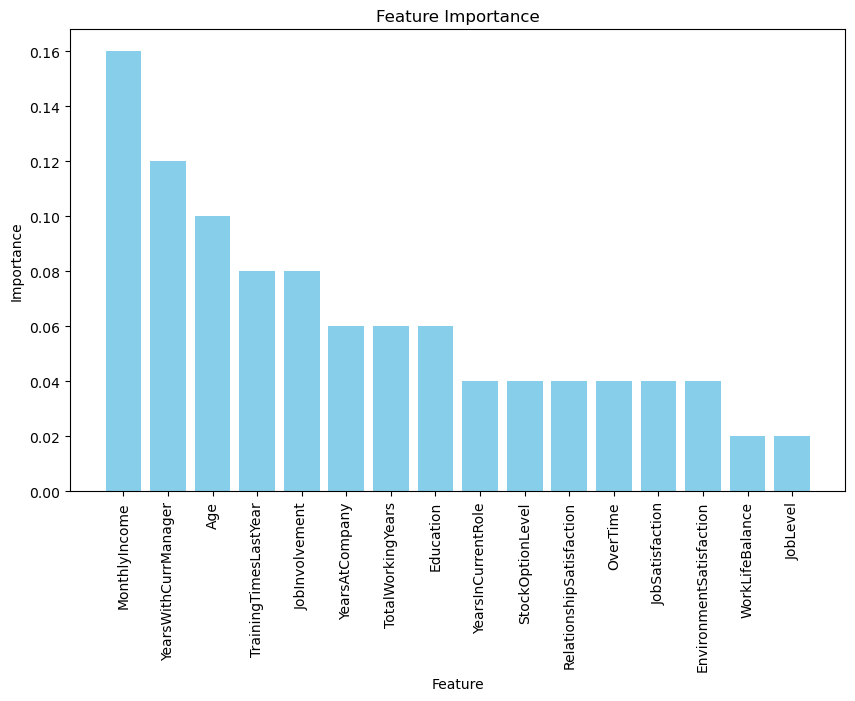


Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       247
           1       0.45      0.57      0.50        47

    accuracy                           0.82       294
   macro avg       0.68      0.72      0.70       294
weighted avg       0.84      0.82      0.83       294



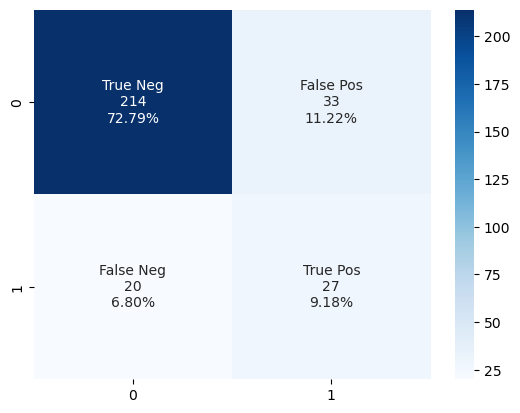

In [328]:
classifier_results = model('AdaBoostClassifier',AdaBoostClassifier(random_state=48), X_train, X_test, y_train, y_test)
results_dict['AdaBoostClassifier'] = classifier_results




In [329]:
for key,val in results_dict.items():
    results_dict[key] = [round(i*100,2) for i in val]

In [330]:
#Convert the results dictionary to a DataFrame
results_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TP%', 'FP%', 'TN%', 'FN%'])
results_df = results_df.sort_values(by=['Accuracy', 'F1-Score', 'Precision', 'Recall'], ascending=False)
results_df

Accuracy  Precision  Recall  F1-Score    TP%    FP%  \
XGBoost                82.31      45.45   53.19     49.02  53.19  12.15   
AdaBoostClassifier     81.97      45.00   57.45     50.47  57.45  13.36   
LGBMClassifier         80.95      42.37   53.19     47.17  53.19  13.77   
RandomForest           80.95      41.82   48.94     45.10  48.94  12.96   
GaussianProcess        80.27      41.79   59.57     49.12  59.57  15.79   
MLPClassifier          79.93      39.66   48.94     43.81  48.94  14.17   
DecisionTree           70.75      25.93   44.68     32.81  44.68  24.29   

                      TN%    FN%  
XGBoost             87.85  46.81  
AdaBoostClassifier  86.64  42.55  
LGBMClassifier      86.23  46.81  
RandomForest        87.04  51.06  
GaussianProcess     84.21  40.43  
MLPClassifier       85.83  51.06  
DecisionTree        75.71  55.32

### Hyperparameter Tunning

In [206]:
def print_classification_report(classifier, X, y):
    y_pred = classifier.predict(X)
    report = classification_report(y, y_pred)
    print("Classification Report:")
    print(report)

In [341]:
def hyperparameter_tuning_and_evaluation(model, X_train,X_test, y_train,y_test, param_grid):
    # Perform Grid Search with 5-fold cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = grid_search.best_params_

    return best_params


In [335]:
tuned_results = {}
classifiers = [
    RandomForestClassifier(random_state=42),
    XGBClassifier(random_state=42),
    MLPClassifier(random_state=42),
    GaussianProcessClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42),
    LGBMClassifier(learning_rate=0.01, max_depth=3, n_estimators=1000),
    AdaBoostClassifier(random_state=48)
]

### XGBoost Classfier

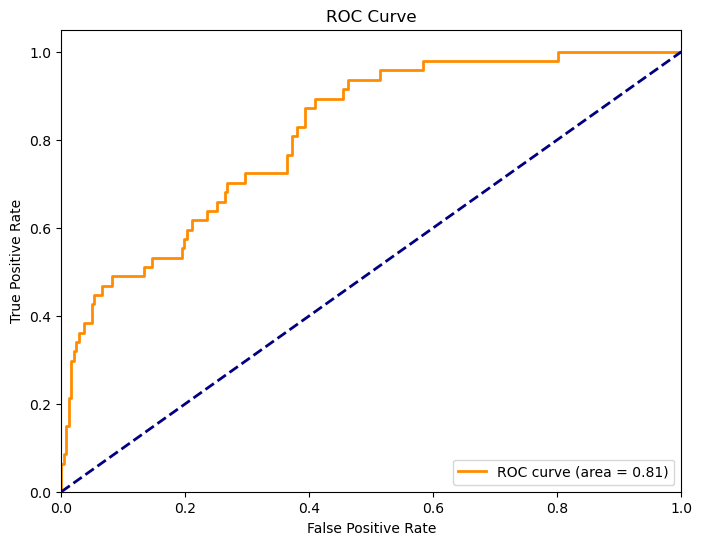

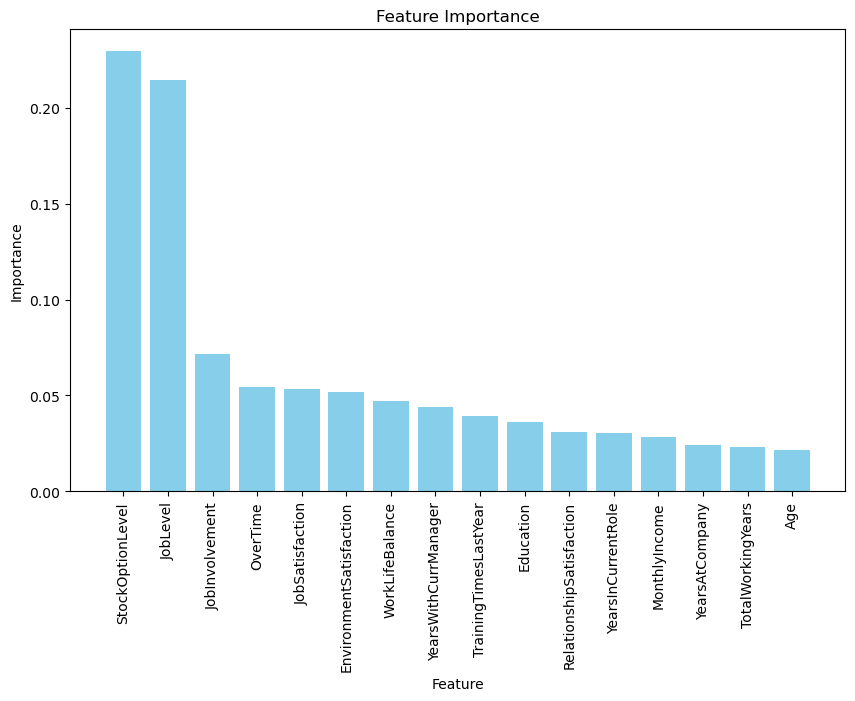


Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       247
           1       0.41      0.51      0.46        47

    accuracy                           0.81       294
   macro avg       0.66      0.69      0.67       294
weighted avg       0.82      0.81      0.81       294



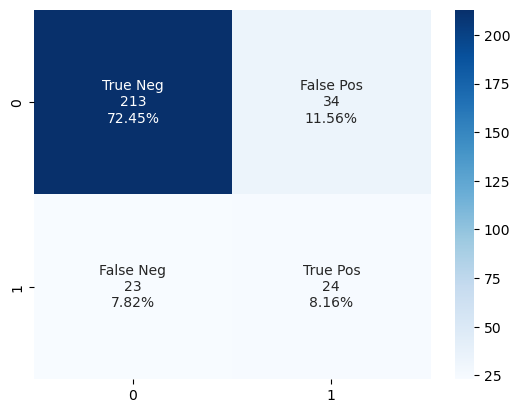

{'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200}


In [346]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

best_params = hyperparameter_tuning_and_evaluation(XGBClassifier(random_state=42), X_train, X_test, y_train, y_test,param_grid)
classifier_results = model('XGBoost',XGBClassifier(**best_params), X_train, X_test, y_train, y_test)
tuned_results['XGBoost'] = classifier_results
print(best_params)

### MultiLayerPeceptronClassifier

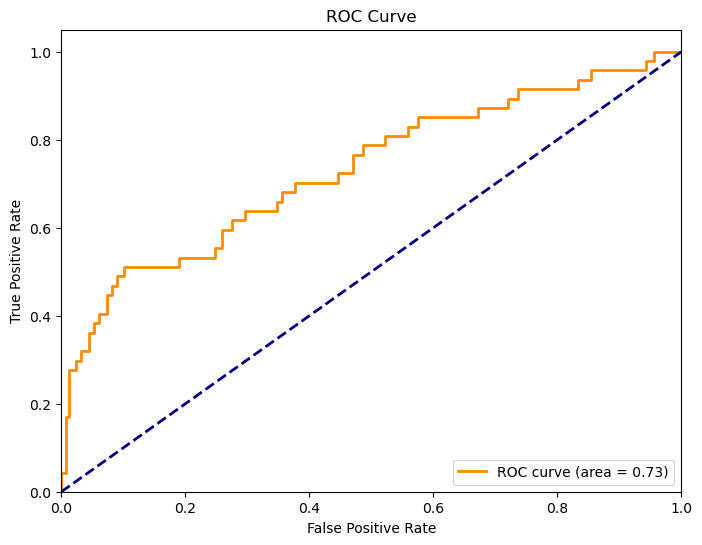


Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       247
           1       0.42      0.51      0.46        47

    accuracy                           0.81       294
   macro avg       0.66      0.69      0.67       294
weighted avg       0.83      0.81      0.82       294



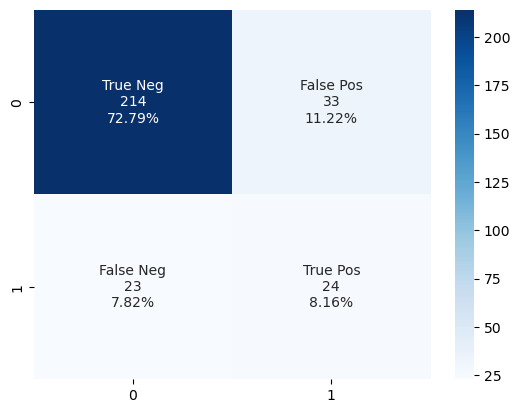

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'solver': 'adam'}


In [347]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

best_params = hyperparameter_tuning_and_evaluation(MLPClassifier(random_state=42), X_train, X_test, y_train, y_test,param_grid)
classifier_results = model('MLPClassifier',MLPClassifier(**best_params), X_train, X_test, y_train, y_test)
tuned_results['MLPClassifier'] = classifier_results
print(best_params)

### LightGBMClassfier

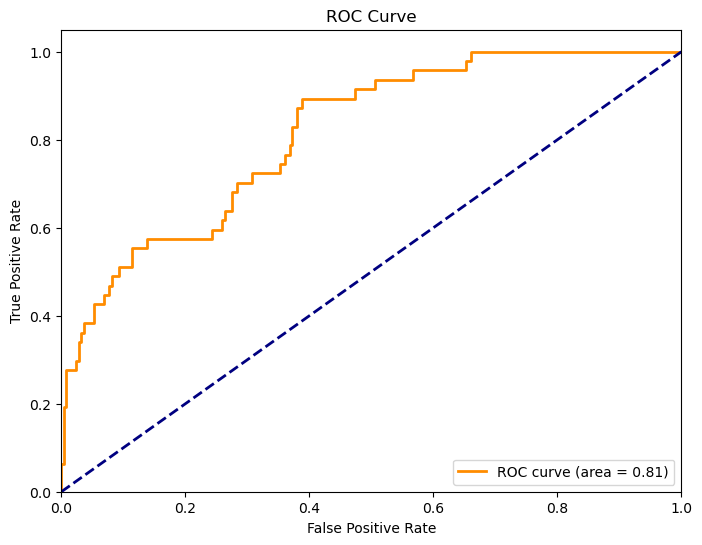

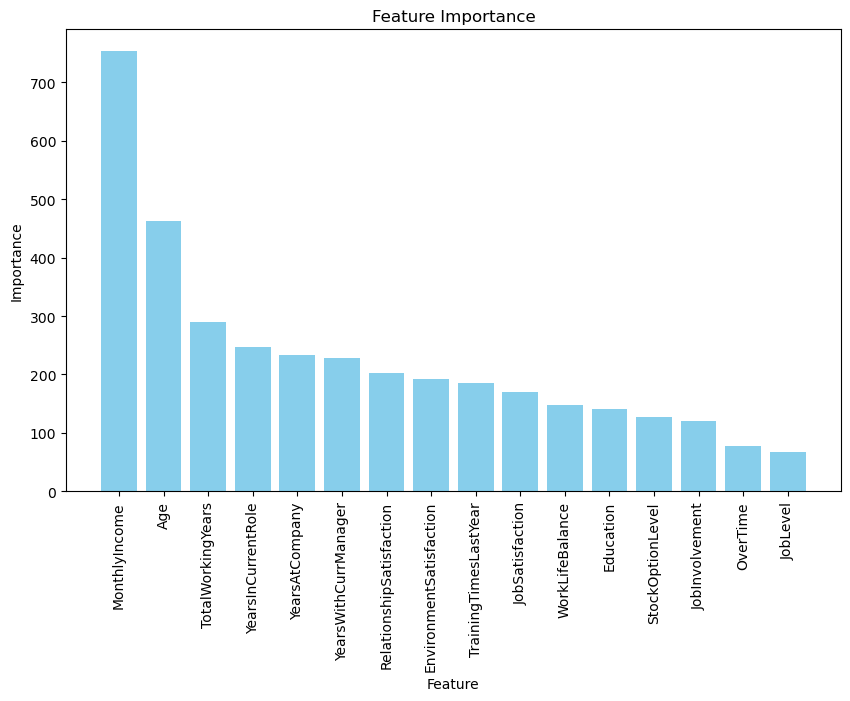


Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       247
           1       0.48      0.55      0.51        47

    accuracy                           0.83       294
   macro avg       0.70      0.72      0.71       294
weighted avg       0.84      0.83      0.84       294



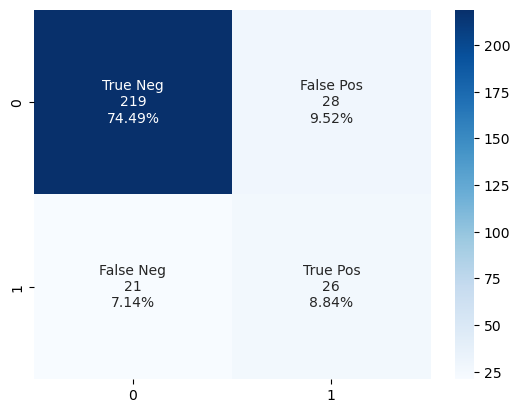

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 200, 'num_leaves': 31}


In [348]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 63, 127]
}

best_params = hyperparameter_tuning_and_evaluation(LGBMClassifier(random_state=42), X_train, X_test, y_train, y_test,param_grid)
classifier_results = model('LGBMClassifier',LGBMClassifier(**best_params), X_train, X_test, y_train, y_test)
tuned_results['LGBMClassifier'] = classifier_results
print(best_params)

### AdaboostClassifier

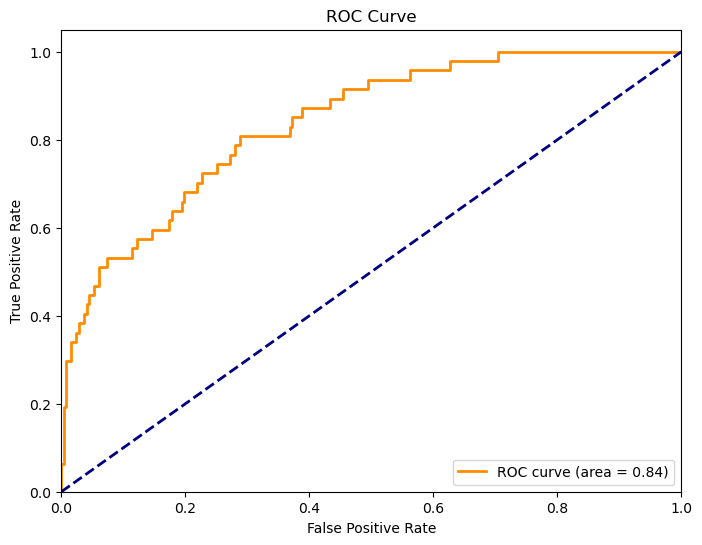

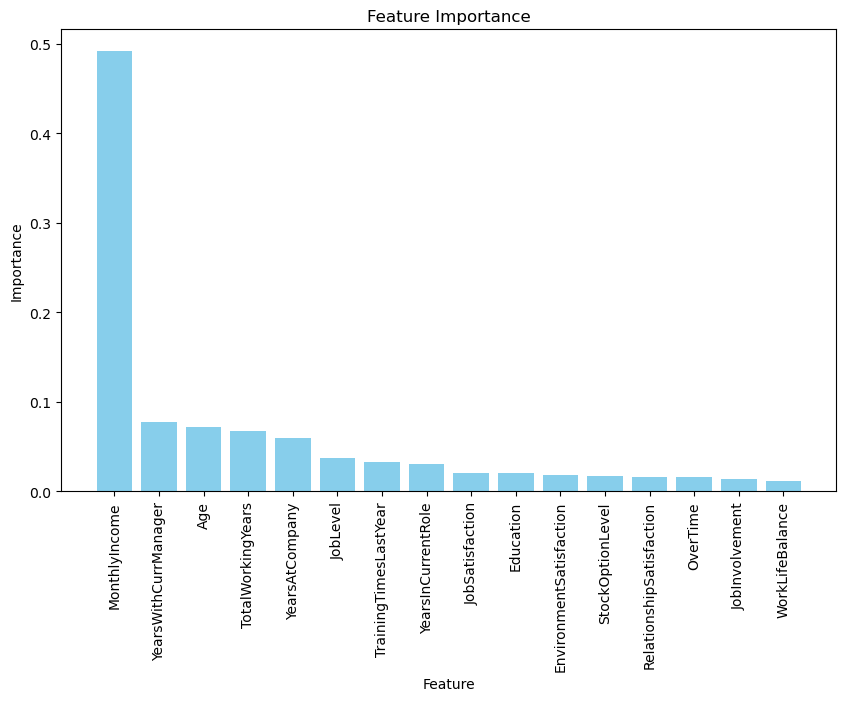


Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.86      0.89       247
           1       0.44      0.57      0.50        47

    accuracy                           0.82       294
   macro avg       0.68      0.72      0.69       294
weighted avg       0.84      0.82      0.83       294



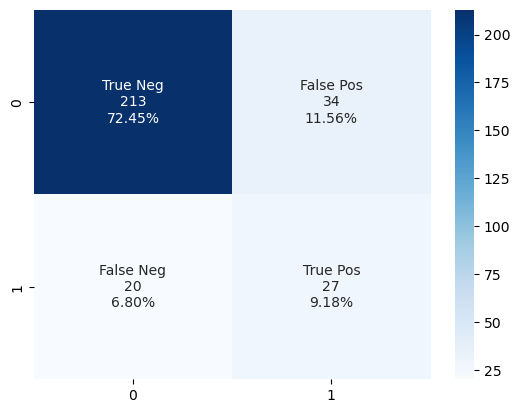

{'learning_rate': 0.5, 'n_estimators': 700}


In [345]:
param_grid = {
    'n_estimators': [700, 900, 1000, 1100, 1200],
    'learning_rate': [0.1, 0.5, 1.0],
}

best_params = hyperparameter_tuning_and_evaluation(AdaBoostClassifier(random_state=42), X_train, X_test, y_train, y_test,param_grid)
classifier_results = model('AdaBoostClassifier',AdaBoostClassifier(**best_params), X_train, X_test, y_train, y_test)
tuned_results['AdaBoostClassifier'] = classifier_results
print(best_params)

In [349]:
for key,val in tuned_results.items():
    tuned_results[key] = [round(i*100,2) for i in val]

In [351]:
tuned_df = pd.DataFrame.from_dict(tuned_results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TP%', 'FP%', 'TN%', 'FN%'])
tuned_df = tuned_df.sort_values(by=['Accuracy', 'F1-Score', 'Precision', 'Recall'], ascending=False)
tuned_df

Accuracy  Precision  Recall  F1-Score    TP%    FP%  \
LGBMClassifier         83.33      48.15   55.32     51.49  55.32  11.34   
AdaBoostClassifier     81.63      44.26   57.45     50.00  57.45  13.77   
MLPClassifier          80.95      42.11   51.06     46.15  51.06  13.36   
XGBoost                80.61      41.38   51.06     45.71  51.06  13.77   

                      TN%    FN%  
LGBMClassifier      88.66  44.68  
AdaBoostClassifier  86.23  42.55  
MLPClassifier       86.64  48.94  
XGBoost             86.23  48.94

### Comparing with base models
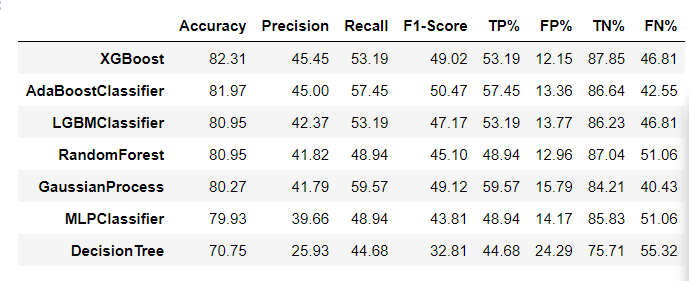